<H1><center> Stock Price Prediction</center></H1>

<H3>
- Akshita Garg (akshitag)
- Mohit Gattani (mgattani)
- Sross Gupta (srossg)

## Introduction

## Project Pipeline for Stock price prediction
### Step 1 : Data Collection and cleaning (using Alphavantage API)
   #### Data Gathering
        Internet has a lot of finance APIs which provide historical stock data. We explored different APIs before finalizing to choose Alphavantage because it provides easy access to the data and helps in directly converting data into pandas dataframe. Data has historical data of the last 6 years i.e. from 2012 to March 2018.
        We tried gathering the data for the S&P 500 companies. However, since the time taken to load the data was more, we chose the first 50 companies for the analysis. The data includes date, opening price, high price, low price, closing price,and volume of the stocks being transacted on that particular day.
    
#### Data Cleaning

        Since the data was not clean, we transposed the data to create features for our model. Upon conversion of the data, date Open, High, Low and Close price for each company became the features of the data. The model will be trained on few of the observations and will be predicting the test data which is the remaining observations. Company names were added in the column names itself. 
        There are two most important factors for an investor to invest in the stock market; current investment of the person and the future price of the stock. However, investors face challanges in interpreting whether the stock will go up or down. To overcome this challange, we decided to use tensor flow model to predict the stock prices. 


### Step 2 : Data Transformation / Feature Engineering
        - We transformed the stocks into columns by unpivotting the rows into columns. For eg. `NDAQ`,`SPX` etc. is transformed with each having the attributes as "open", "close", "low", "high" and "volume". These are taken as features for our model
        - There was huge variation amongst the different stock prices data, so it was important to get everything on one scale, so we normalized the data 
### Step 3 : Model Fitting and Validation

#### Time Series Model
    Developing the time series model incorporating both trend and seasonality in data. Used previous data to extrapolate the future using FBprophet.
    
#### TensorFlow
       TensorFlow is an open-source library for data-flow programming. It is toolkit for deep-learning It cerates multiple layers of variables that helps in better learning of the model. The nodes of the tensor flow represent the mathematical operations and edges represent multidimensional arrays.




In [55]:
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from IPython.display import HTML
import io
import base64
import fbprophet 
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix

In [18]:
# List of all companies and stock markets for which data was collected. This includes SNP500, NASDAQ and DJI market data
companies = ['CA', 'ATVI', 'BBBY', 'DISCK', 'ADI', 'EBAY', 'DJI', 'SPX', 'FFIV', 'FOXA', 'AMAT', 'AMD', 'AMGN', 'CSCO', 'DLTR', 'ADP', 'CHRW', 'AMZN', 'NDAQ', 'CBOE', 'EXPE', 'ESRX', 'AVGO', 'CSX', 'ADSK', 'AAPL', 'AKAM', 'CHTR', 'EQIX', 'FOX', 'ETFC', 'FISV', 'CELG', 'EA', 'FAST', 'FLIR', 'AAL', 'BIIB', 'EXPD', 'CMCSA', 'CERN', 'DISH', 'ADBE', 'ALXN', 'COST', 'CTAS', 'CINF', 'CTXS', 'FB', 'CTSH', 'FITB', 'CME', 'DISCA']

In [19]:
# Read API Key 
with open('api_key.txt', 'r') as f:
    apiKey = f.read().replace('\n','')

In [10]:
# Collect data from Alphavantage
ts = TimeSeries(key=apiKey, output_format='pandas')
stock_data1 = pd.DataFrame()
for i in companies: 
    print(i)
    data, meta_data = ts.get_daily(symbol=i, outputsize='full')
    data["cmpny"] = i
    time.sleep(1)
    stock_data1= stock_data1.append(data, ignore_index=False)

### We had stored the data pulled from the API to local csv format

In [35]:
# Read from csv (for local testing)
stock_data = pd.read_csv('final.csv')

In [36]:
stock_data.head()

date  1. open  2. high     3. low  4. close   5. volume cmpny
0  1/3/00  1469.25  1478.00  1438.3600   1455.22   931800000   SPX
1  1/4/00  1455.22  1455.22  1397.4301   1399.42  1009000000   SPX
2  1/5/00  1399.42  1413.27  1377.6801   1402.11  1085500000   SPX
3  1/6/00  1402.11  1411.90  1392.1000   1403.45  1092300000   SPX
4  1/7/00  1403.45  1441.47  1400.7300   1441.47  1225200000   SPX

In [59]:
# Feature Engineering to create stock prices as time series features
stock_data_dict = dict(tuple(stock_data.groupby('cmpny')))
stock_data_flat = stock_data_dict['SPX']
stock_data_flat =  stock_data_flat.drop(['cmpny'], axis = 1)
stock_data_flat.columns = ['date','SPX_open', 'SPX_high', 'SPX_low', 'SPX_close', 'SPX_volume']
for key,v in stock_data_dict.items():
#     print(key)
    v = v.drop(['cmpny'], axis=1)
    v.columns = ['date',key+'_open', key+'_high', key+'_low', key+'_close', key+'_volume']
    stock_data_flat = pd.merge(stock_data_flat,v)
    
stock_data = stock_data_flat.drop(['date'], axis=1).values

In [62]:
stock_data_flat.columns

Index(['date', 'SPX_open', 'SPX_high', 'SPX_low', 'SPX_close', 'SPX_volume',
       'AAL_open', 'AAL_high', 'AAL_low', 'AAL_close',
       ...
       'FOXA_open', 'FOXA_high', 'FOXA_low', 'FOXA_close', 'FOXA_volume',
       'NDAQ_open', 'NDAQ_high', 'NDAQ_low', 'NDAQ_close', 'NDAQ_volume'],
      dtype='object', length=266)

## Auto-correlation Plots

#### The graph above shows how different stocks are autocorrelated across the time lag. We randomly chose 3 companies and all the  3 markets, S&P, NASDAQ, and DJI. The graph shows positive autocorrelation between all the 6 market closing prices for around 500 lagged days, then going negative from 600 to 1400 days.

/Users/srossgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """
/Users/srossgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
/Users/srossgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  import sys
/Users/srossgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
/Users/srossgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.autocorrelat

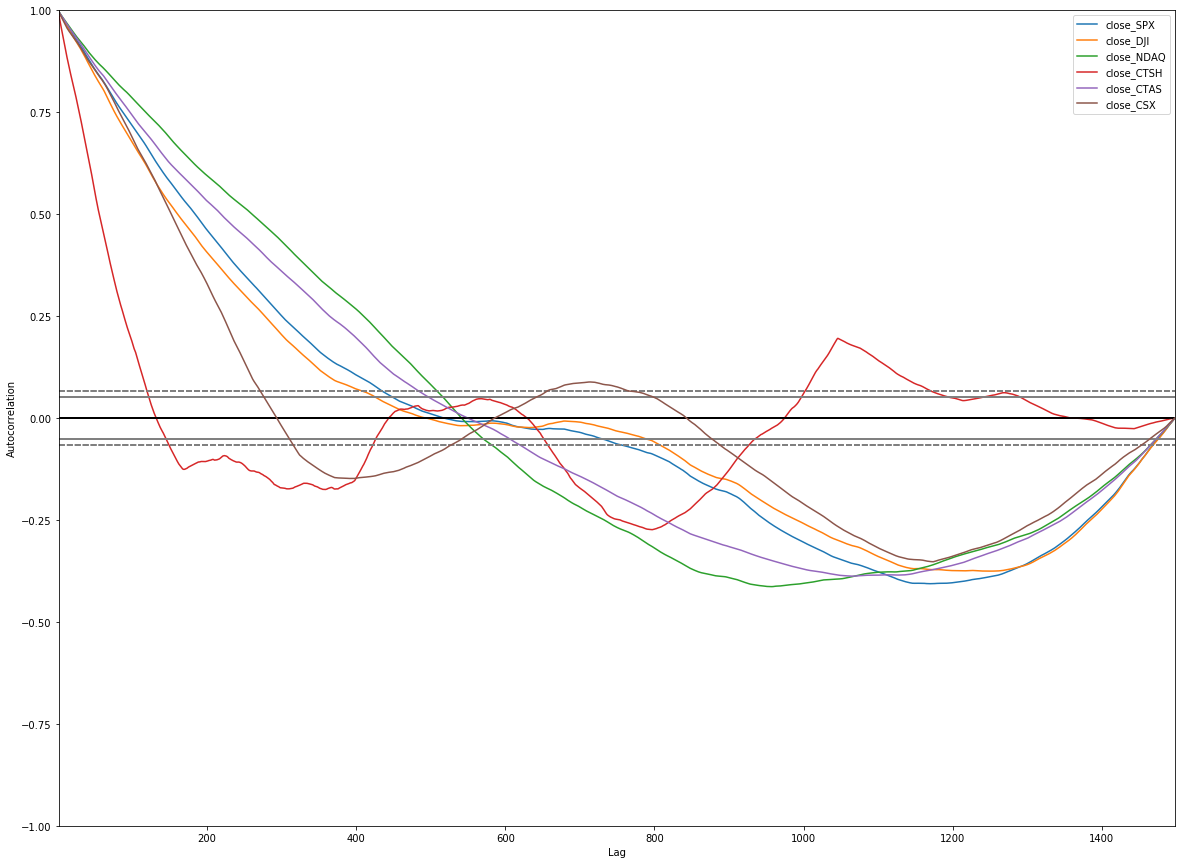

In [64]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

_ = autocorrelation_plot(stock_data_flat['SPX_close'], label='close_SPX')
_ = autocorrelation_plot(stock_data_flat['DJI_close'], label='close_DJI')
_ = autocorrelation_plot(stock_data_flat['NDAQ_close'], label='close_NDAQ')
_ = autocorrelation_plot(stock_data_flat['CTSH_close'], label='close_CTSH')
_ = autocorrelation_plot(stock_data_flat['CTAS_close'], label='close_CTAS')
_ = autocorrelation_plot(stock_data_flat['CSX_close'], label='close_CSX')

_ = plt.legend(loc='upper right')
plt.show()

## Correlation plots

### The data for correlation was scaled since the different markets are measured on a different scale. The above graph shows the correlation between the 3 markets, S&P, DJI, and NDAQ, and randomly 3 companies. There is a clear correlation between S&P 500 and DJI market, between S&P 500 and NDAQ and DJI and NDAQ. The companies do not show a good correlation between themselves. There is only a correlation between NDAQ and CTAS.

In [65]:
# scaling the value based on max value scaler
closing_data = pd.DataFrame()
closing_data['close_SPX_scaled'] = stock_data_flat['SPX_close'] / max(stock_data_flat['SPX_close'])
closing_data['close_DJI_scaled'] = stock_data_flat['DJI_close']/ max(stock_data_flat['DJI_close'])
closing_data['close_NDAQ_scaled'] = stock_data_flat['NDAQ_close'] / max(stock_data_flat['NDAQ_close'])
closing_data['close_CTSH_scaled'] = stock_data_flat['CTSH_close'] / max(stock_data_flat['CTSH_close'])
closing_data['close_CTAS_scaled'] = stock_data_flat['CTAS_close'] / max(stock_data_flat['CTAS_close'])
closing_data['close_CSX_scaled'] = stock_data_flat['CSX_close'] / max(stock_data_flat['CSX_close'])

/Users/srossgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


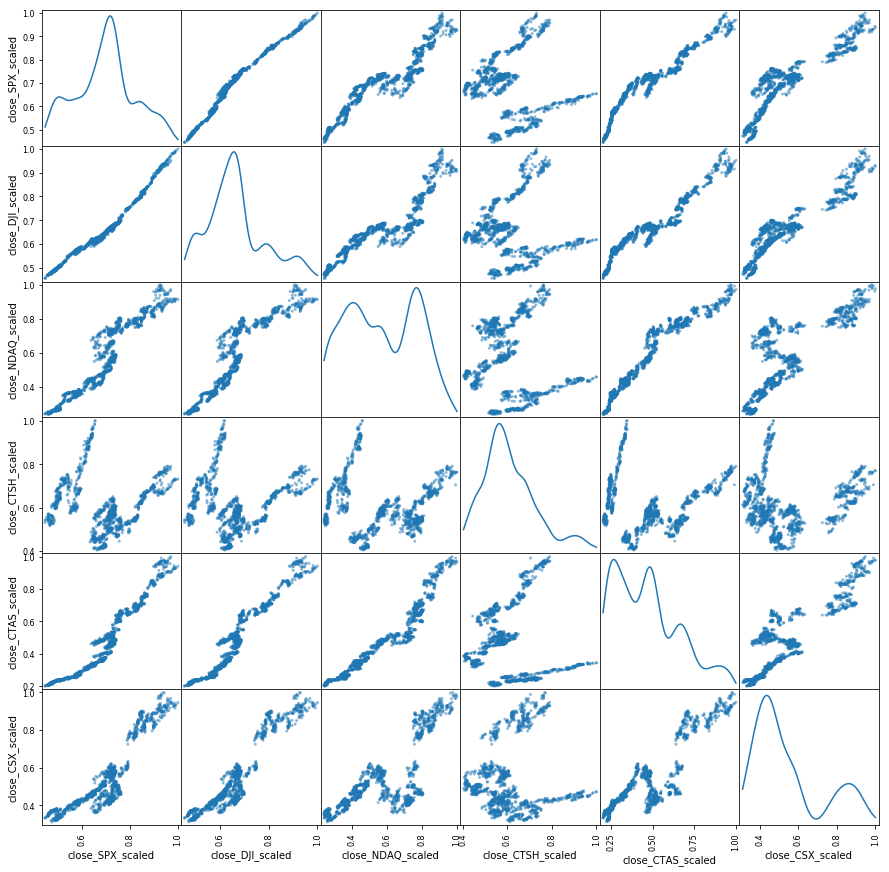

In [66]:
#Plotting scatter matrix for the scaled value
_ = scatter_matrix(pd.concat([closing_data['close_SPX_scaled'],
                              closing_data['close_DJI_scaled'],
                              closing_data['close_NDAQ_scaled'],
                              closing_data['close_CTSH_scaled'], 
                              closing_data['close_CTAS_scaled'], 
                              closing_data['close_CSX_scaled']], axis=1), figsize=(15, 15), diagonal='kde')
plt.show()

## Time Series Model

In [52]:
stock = stock_data_flat.rename(columns={'date': 'ds', 'NDAQ_open': 'y'})
stock_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
stock_prophet.fit(stock)

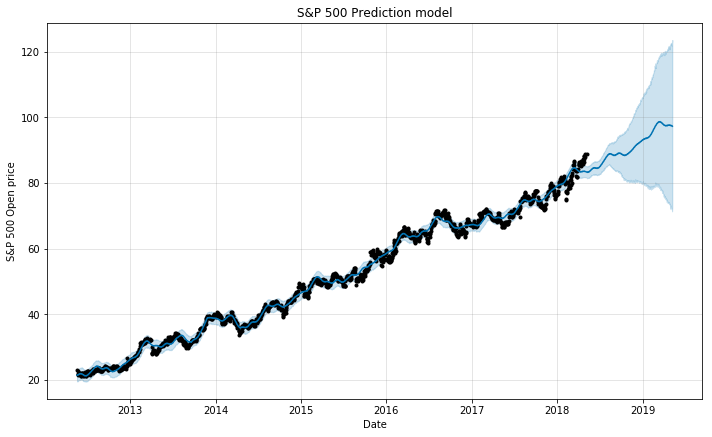

In [53]:
# develop the prediction model for 1 year
stock_forecast = stock_prophet.make_future_dataframe(periods=365, freq='D')
stock_forecast = stock_prophet.predict(stock_forecast)
stock_prophet.plot(stock_forecast, xlabel = 'Date', ylabel = 'S&P 500 Open price')
plt.title('S&P 500 Prediction model');

## Neural Network
- Neural Network computational framework
- Multilayer Perceptrons (MLPs)
- 4 hidden layer model
- Placeholders and variables are defined
- MSE used as cost function
- Minibatch training with Batch_Size = 25 and Epoch = 10

In [67]:
# Scaling the data to get normalized data 
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(stock_data)
stock_data = scaler.transform(stock_data)

In [13]:
# Splitting the data into test and train
n = stock_data.shape[0]
train_till = int(np.floor(0.8*n))
stock_data_train = stock_data[np.arange(0, train_till), :]
print('Numbers of days selected for training: ' + str(len(stock_data_train)))
stock_data_test = stock_data[np.arange(train_till+1, n), :]
print('Number of days seleted for testing: ' + str(len(stock_data_test)))

Numbers of days selected for training: 1198
Number of days seleted for testing: 299


In [14]:
# Creating features and prediction lables form stock data
X_train = stock_data_train[:, 1:]
y_train = stock_data_train[:, 0]
X_test = stock_data_test[:, 1:]
y_test = stock_data_test[:, 0]

In [22]:
# Check the size of dimesions of training and test data
stock_features = X_train.shape[1]
print('Number of stock features used: ' + str(stock_features))

Number of stock features used: 264


In [17]:
# Initiate the network session 
net = tf.InteractiveSession()

In [18]:
# Define Placeholders and initializers for neural network
placeholder_x = tf.placeholder(dtype=tf.float32, shape=[None, stock_features])
placeholder_y = tf.placeholder(dtype=tf.float32, shape=[None])

In [19]:
# Initializers of neural network with uniform distribution and sigma scale
sigma = 1
init_weight = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
init_bias = tf.zeros_initializer()

In [20]:
# Number of neurons for different layers
layer_1_neurons = 1024
layer_2_neurons = 512

In [23]:
# Difine weight and bias variable  
weight_1 = tf.Variable(init_weight([stock_features, layer_1_neurons]))
bias_1 = tf.Variable(init_bias([layer_1_neurons]))
weight_2 = tf.Variable(init_weight([layer_1_neurons, layer_2_neurons]))
bias_2 = tf.Variable(init_bias([layer_2_neurons]))

weight_out = tf.Variable(init_weight([layer_2_neurons, 1]))
bias_out = tf.Variable(init_bias([1]))

In [24]:
#  2 hidden layers and transpose
hidden_1 = tf.nn.relu(tf.add(tf.matmul(placeholder_x, weight_1), bias_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, weight_2), bias_2))
out = tf.transpose(tf.add(tf.matmul(hidden_2, weight_out), bias_out))

In [25]:
# Cost function 
mse = tf.reduce_mean(tf.squared_difference(out, placeholder_y))

In [26]:
# Optimizer function for the neural netowrk
opt = tf.train.AdamOptimizer().minimize(mse)

In [27]:
# Initiate the network
net.run(tf.global_variables_initializer())

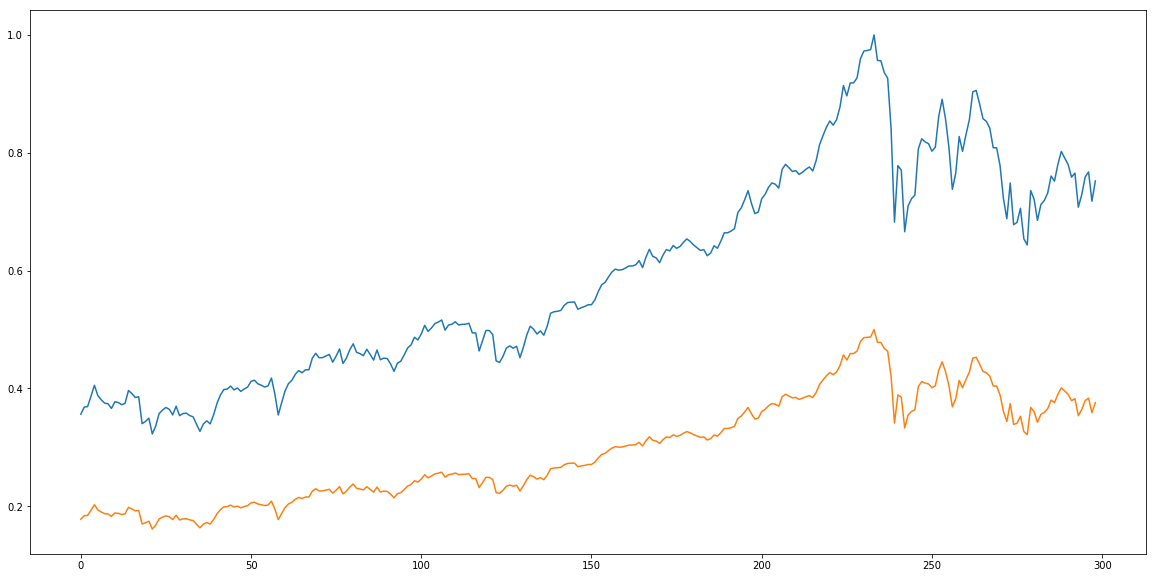

In [68]:
# Plot setup for vislization of  neural network performance
plt.ion()
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()

## Neural network fitting for 10 epochs and batch size 25. Mean squared error decreases with increase in Epoch and after 4 epochs test data perfectly fits our data

MSE Train:  0.00116639
MSE Test:  0.00505308


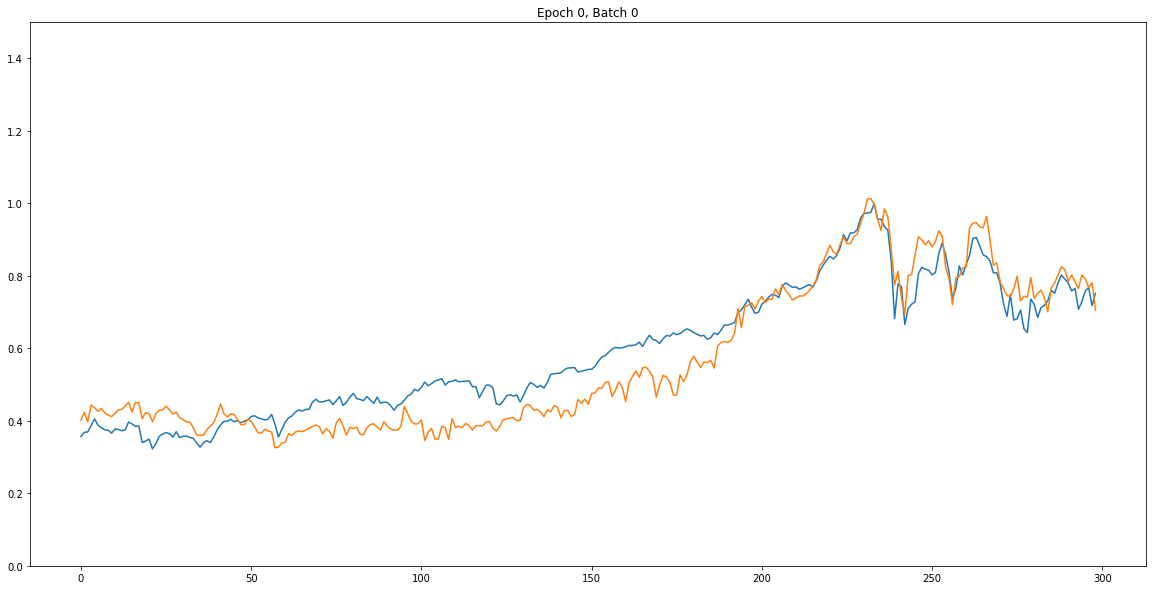

MSE Train:  0.00113715
MSE Test:  0.00977397


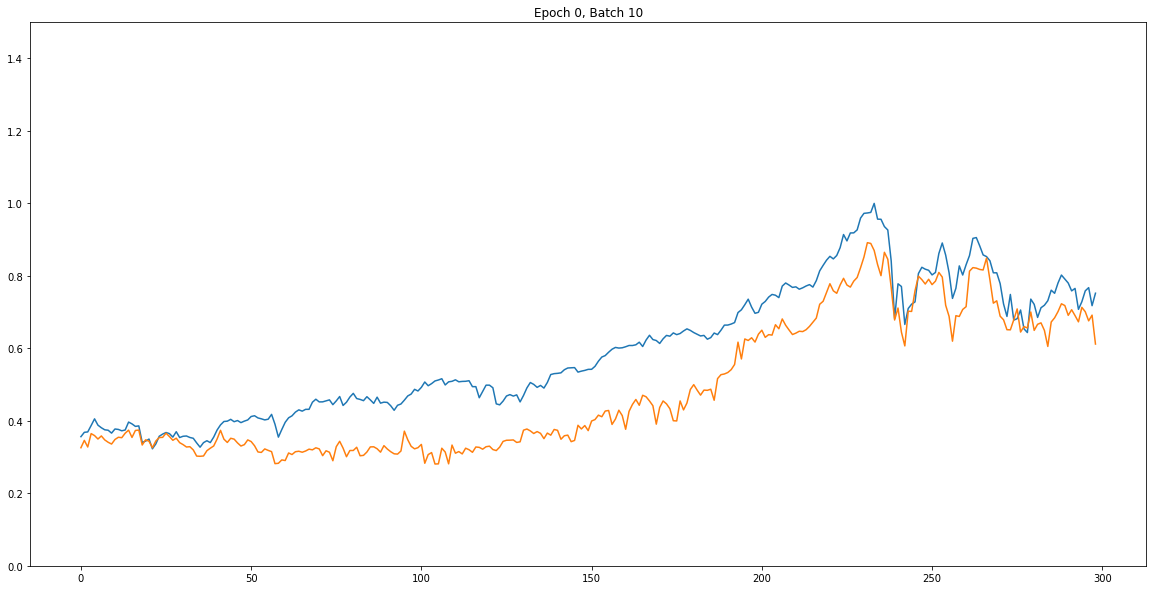

MSE Train:  0.00092037
MSE Test:  0.00924593


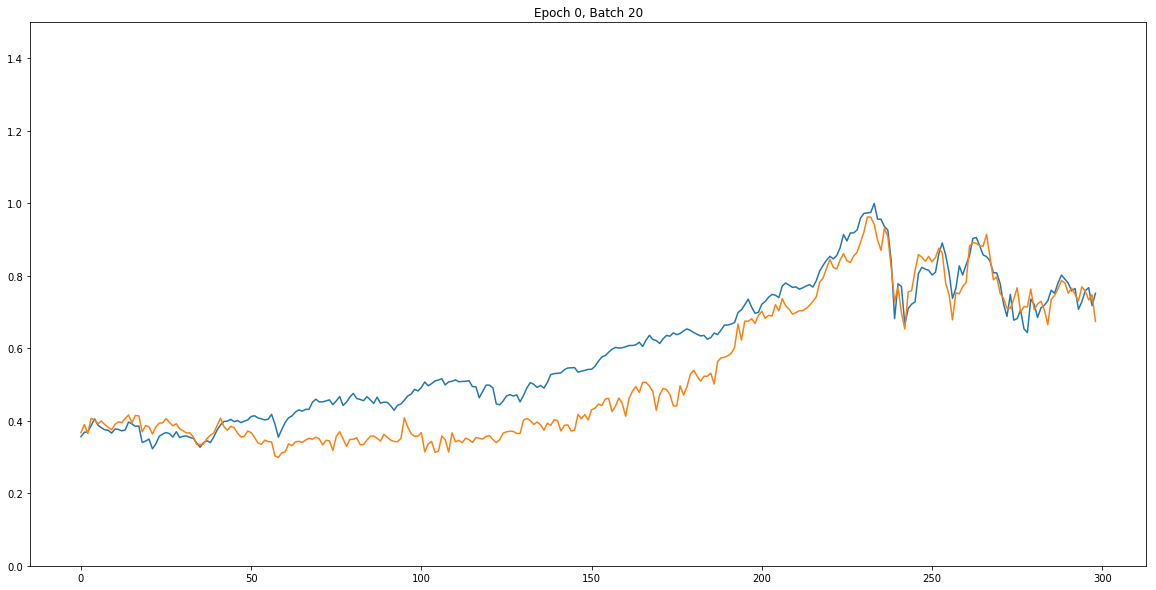

MSE Train:  0.000798372
MSE Test:  0.00982184


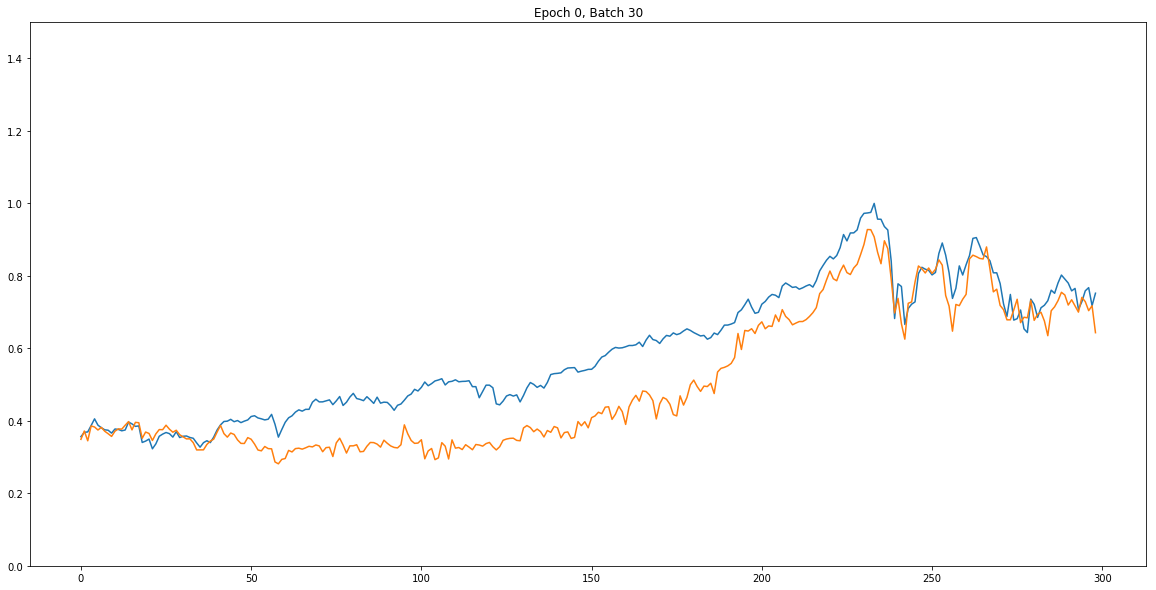

MSE Train:  0.000676657
MSE Test:  0.00969111


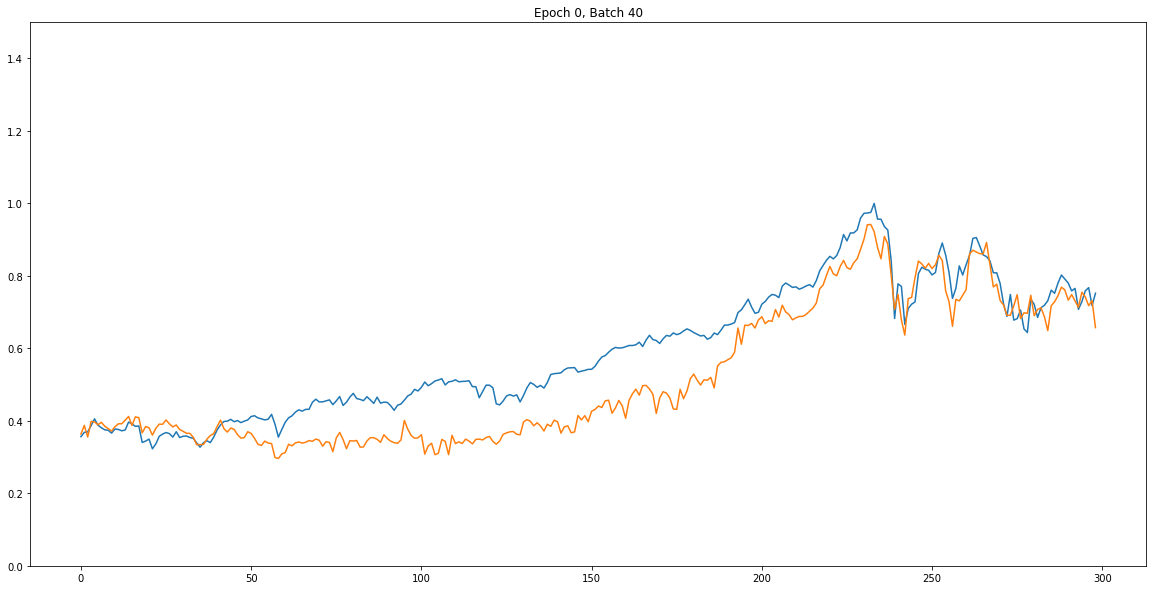

MSE Train:  0.000600879
MSE Test:  0.010429


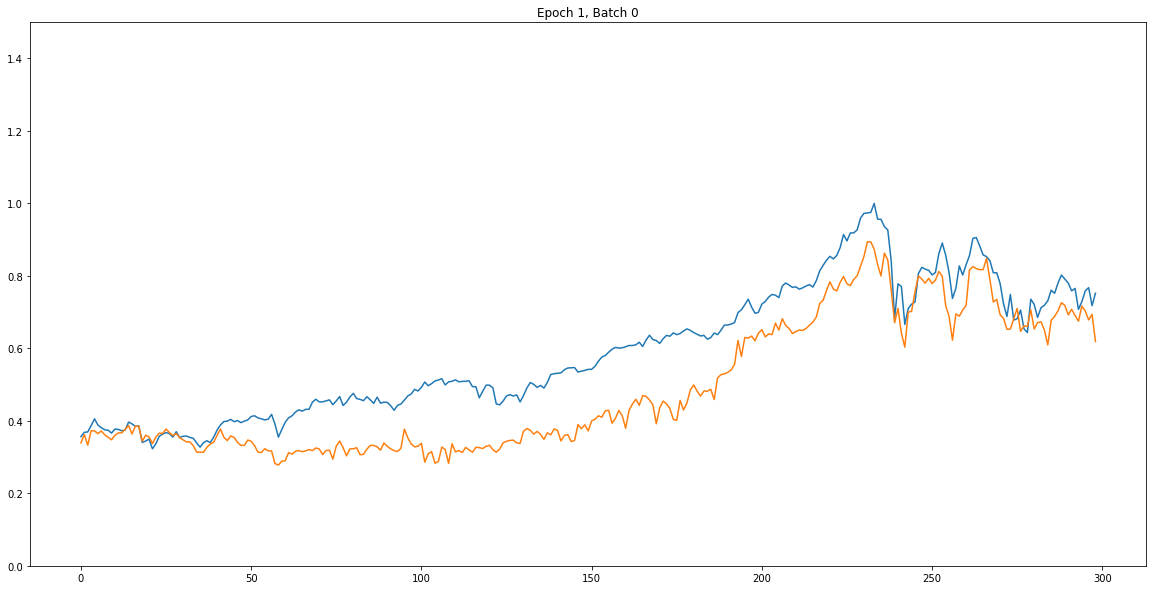

MSE Train:  0.000537946
MSE Test:  0.0102146


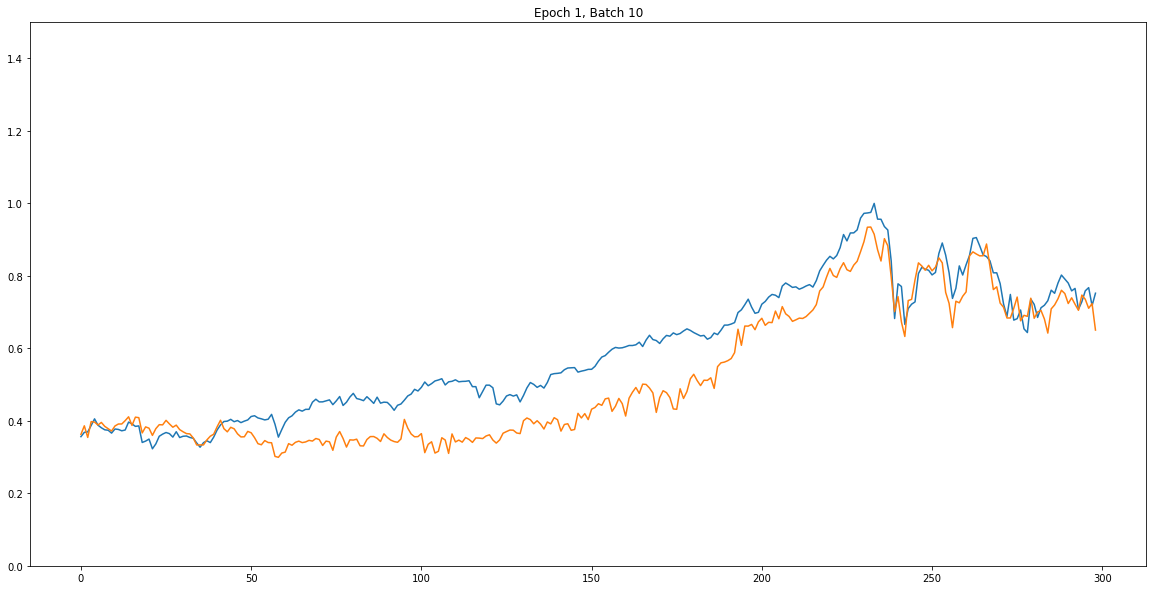

MSE Train:  0.000515447
MSE Test:  0.00988871


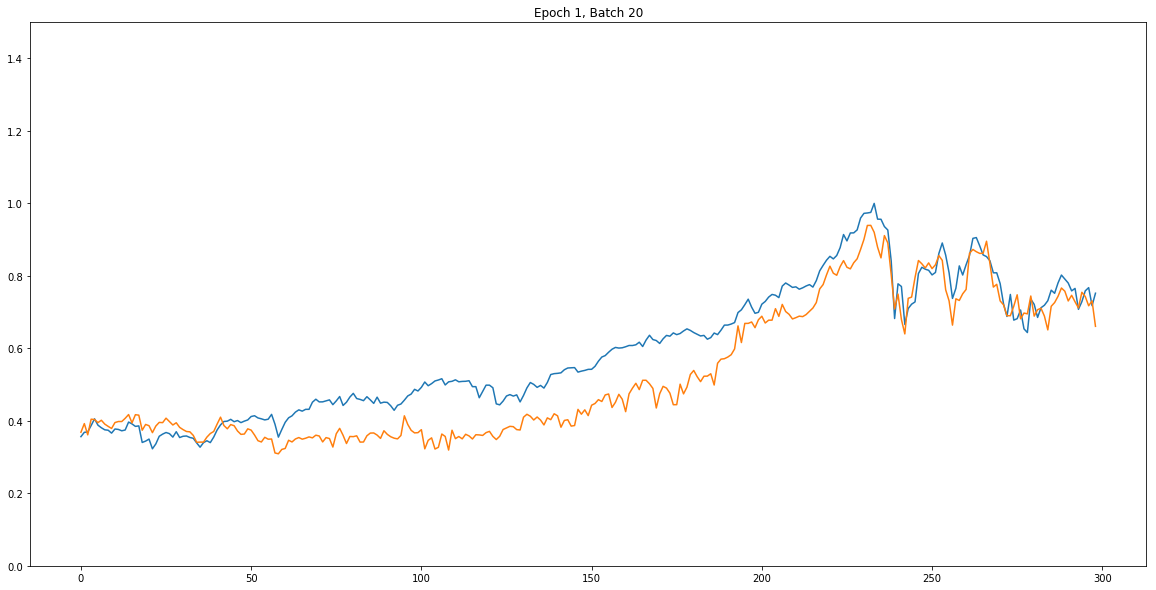

MSE Train:  0.000488262
MSE Test:  0.00945068


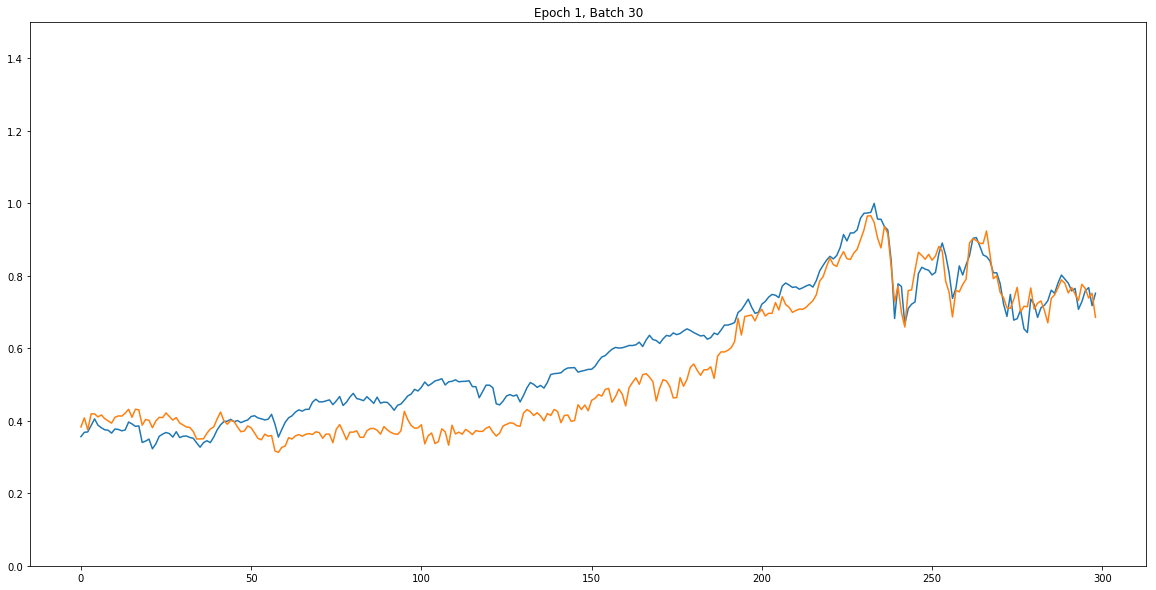

MSE Train:  0.000467838
MSE Test:  0.00961322


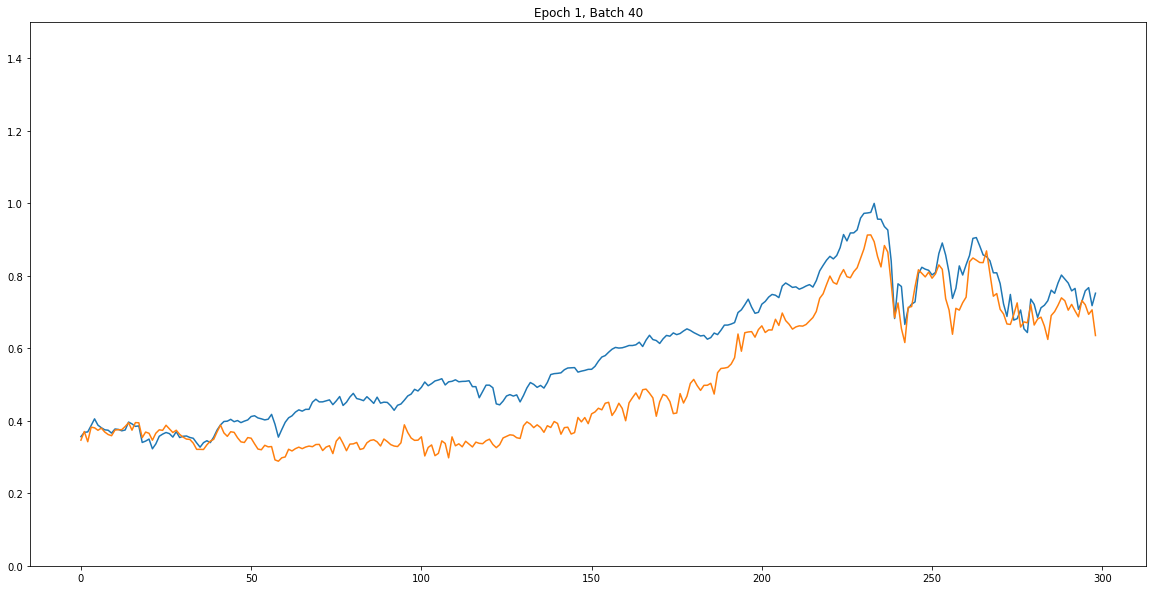

MSE Train:  0.000456994
MSE Test:  0.00979732


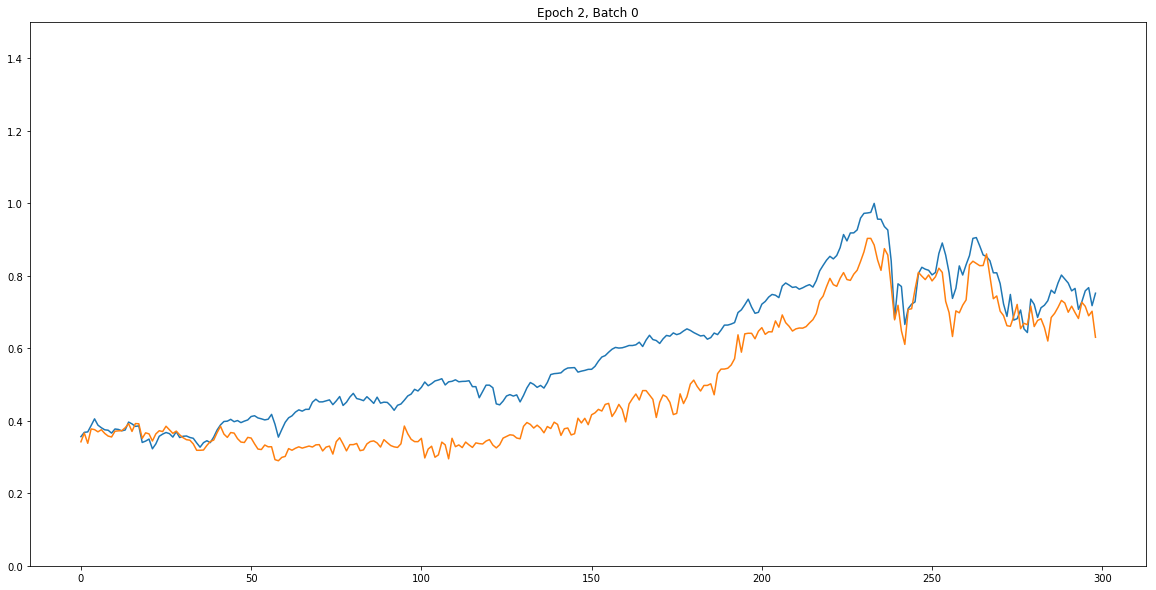

MSE Train:  0.000435305
MSE Test:  0.00972889


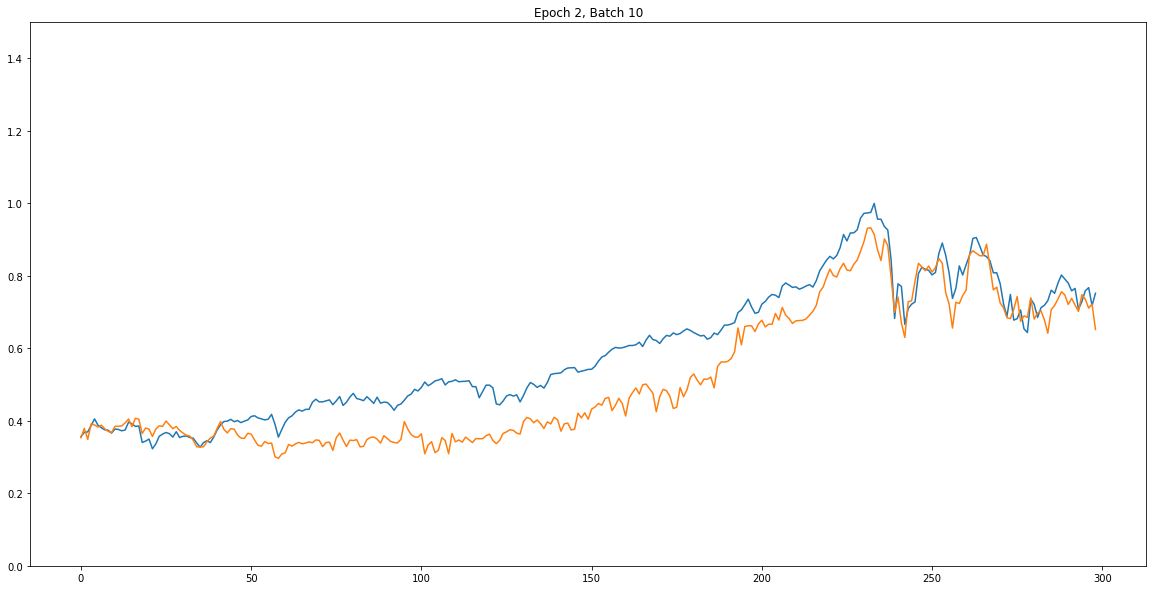

MSE Train:  0.000488049
MSE Test:  0.00973348


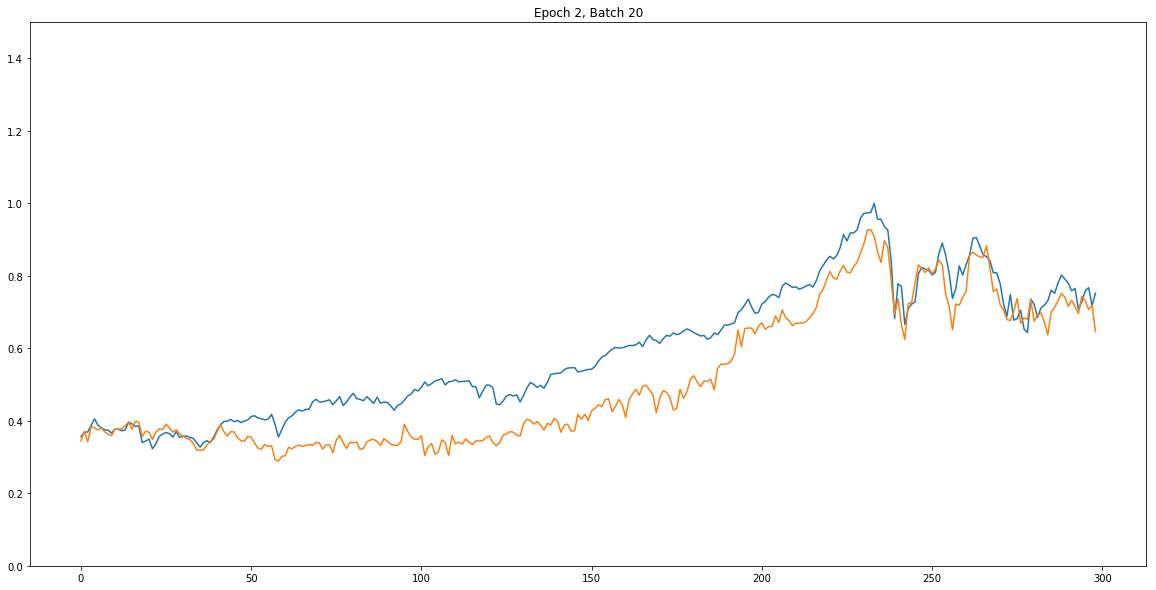

MSE Train:  0.000470302
MSE Test:  0.00991443


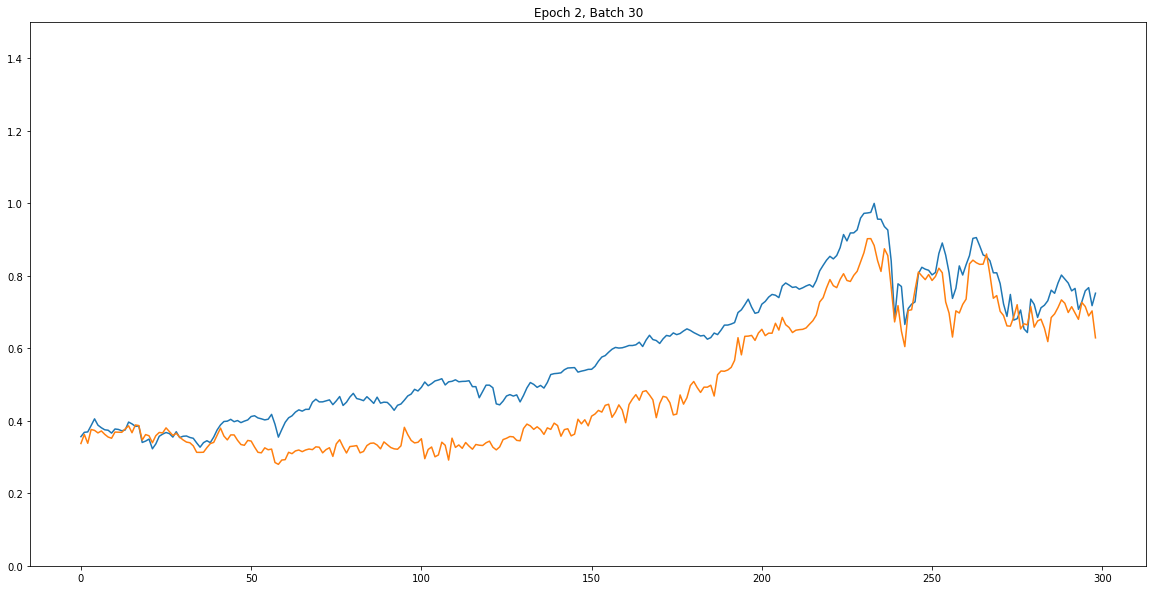

MSE Train:  0.000460521
MSE Test:  0.00966583


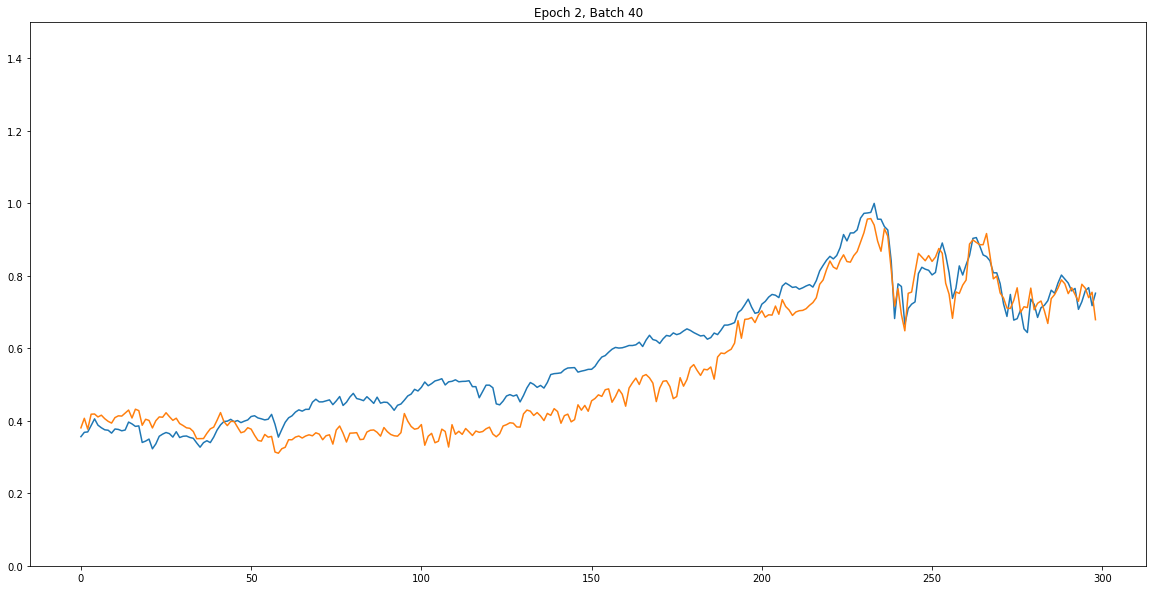

MSE Train:  0.000489424
MSE Test:  0.00969507


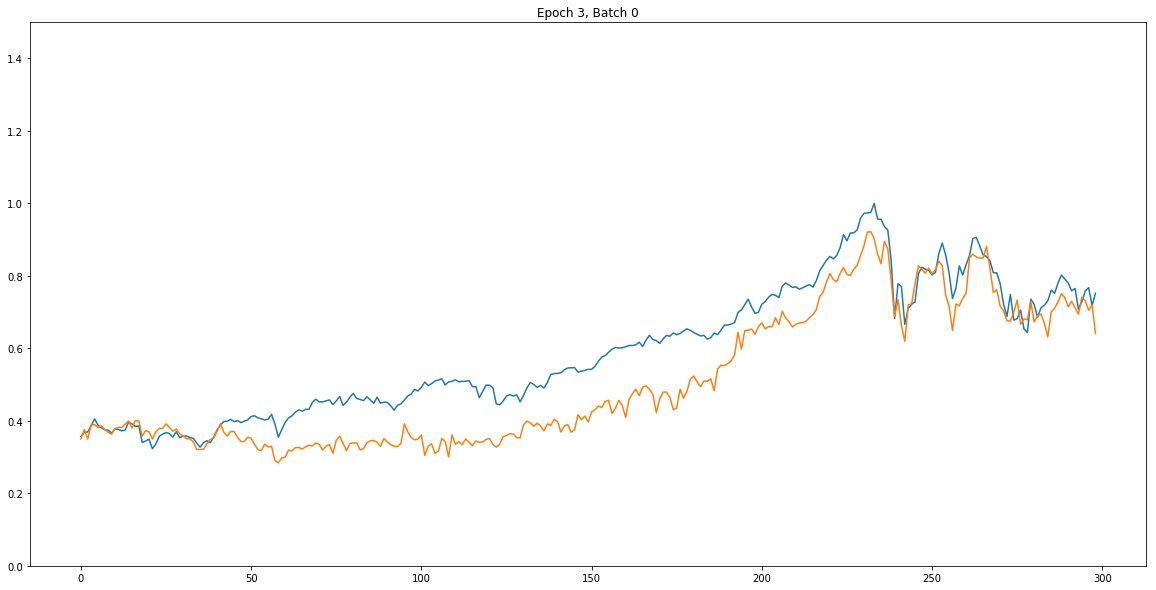

MSE Train:  0.000475683
MSE Test:  0.0096262


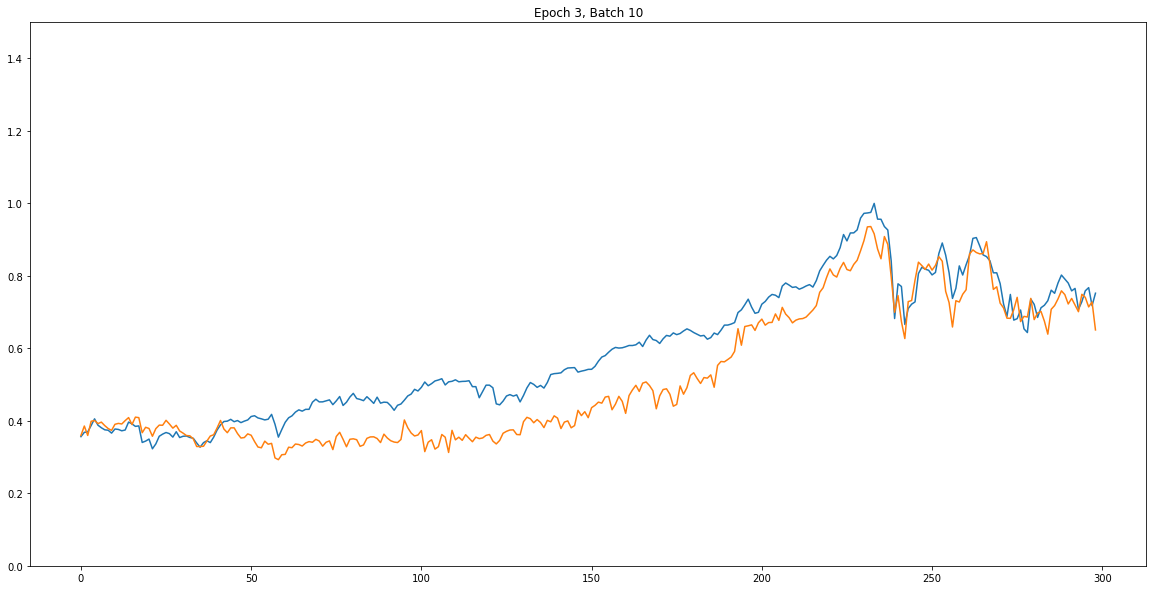

MSE Train:  0.000470508
MSE Test:  0.00936982


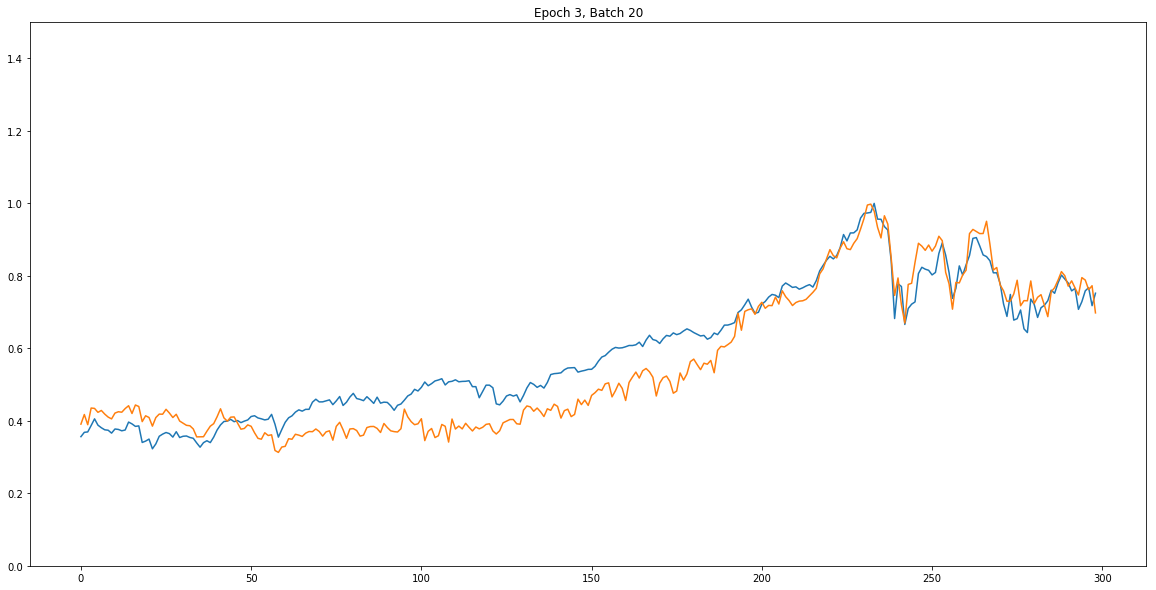

MSE Train:  0.000457291
MSE Test:  0.0093129


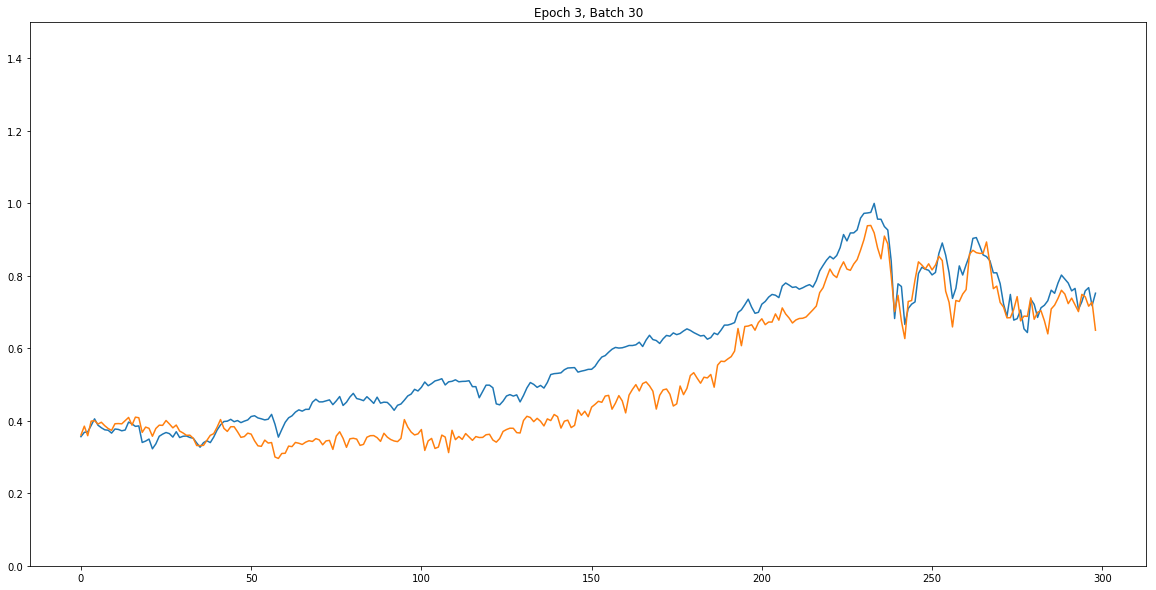

MSE Train:  0.000442187
MSE Test:  0.00919959


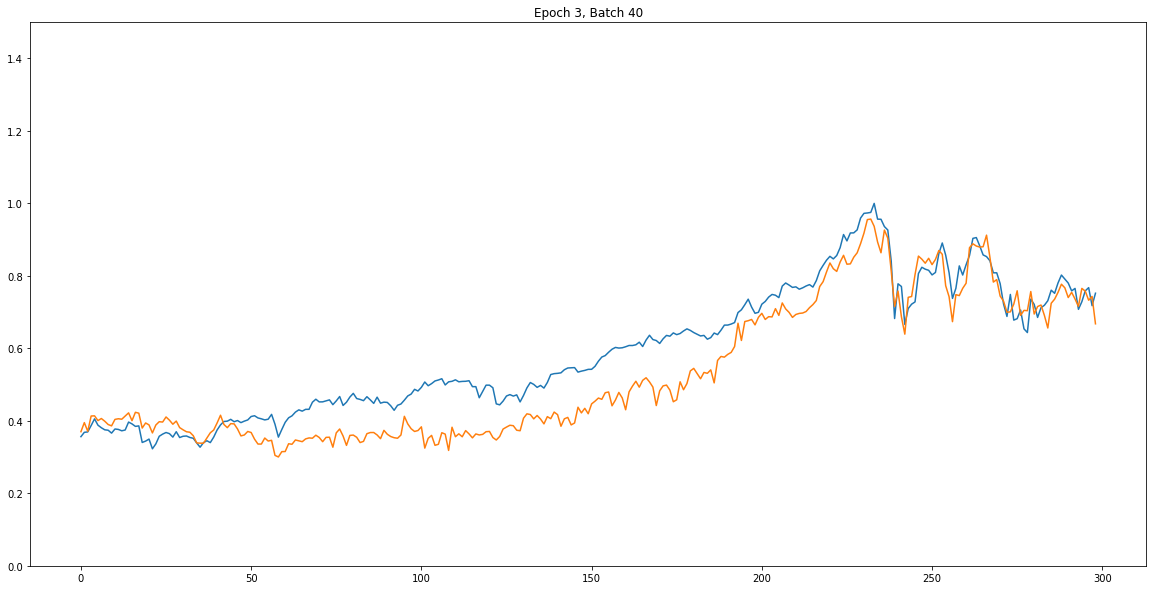

MSE Train:  0.000430931
MSE Test:  0.00924803


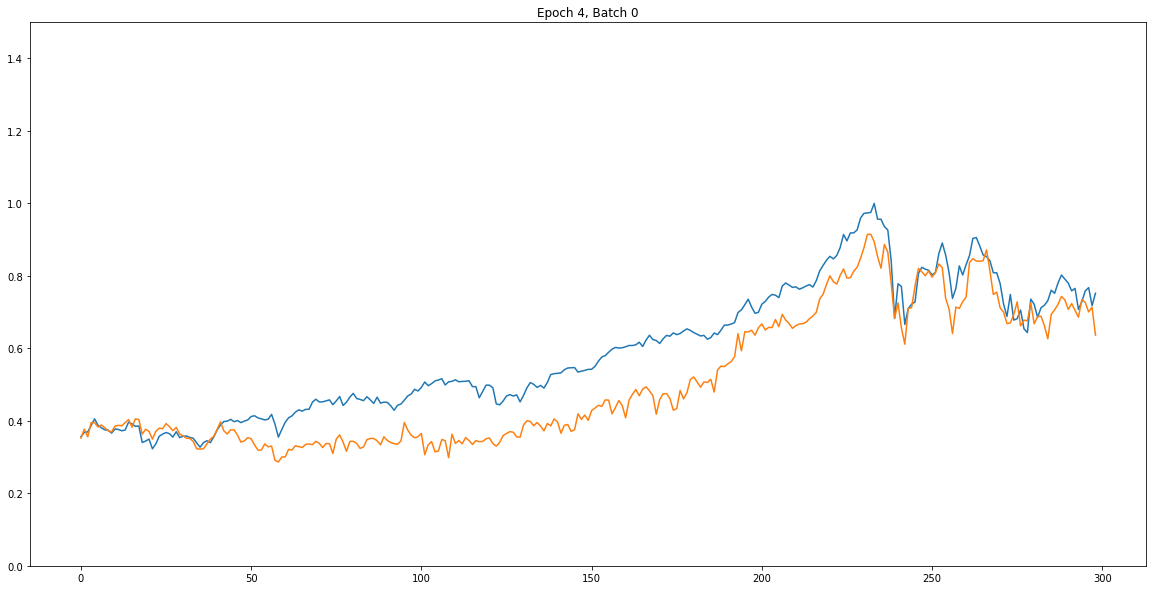

MSE Train:  0.000436039
MSE Test:  0.0092392


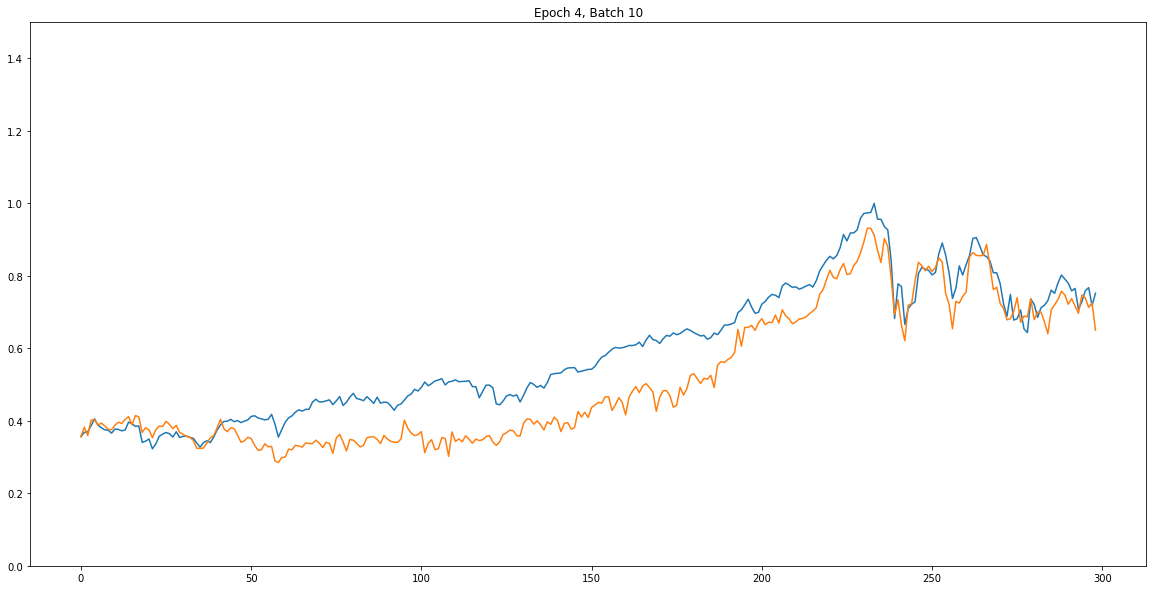

MSE Train:  0.000452849
MSE Test:  0.00933876


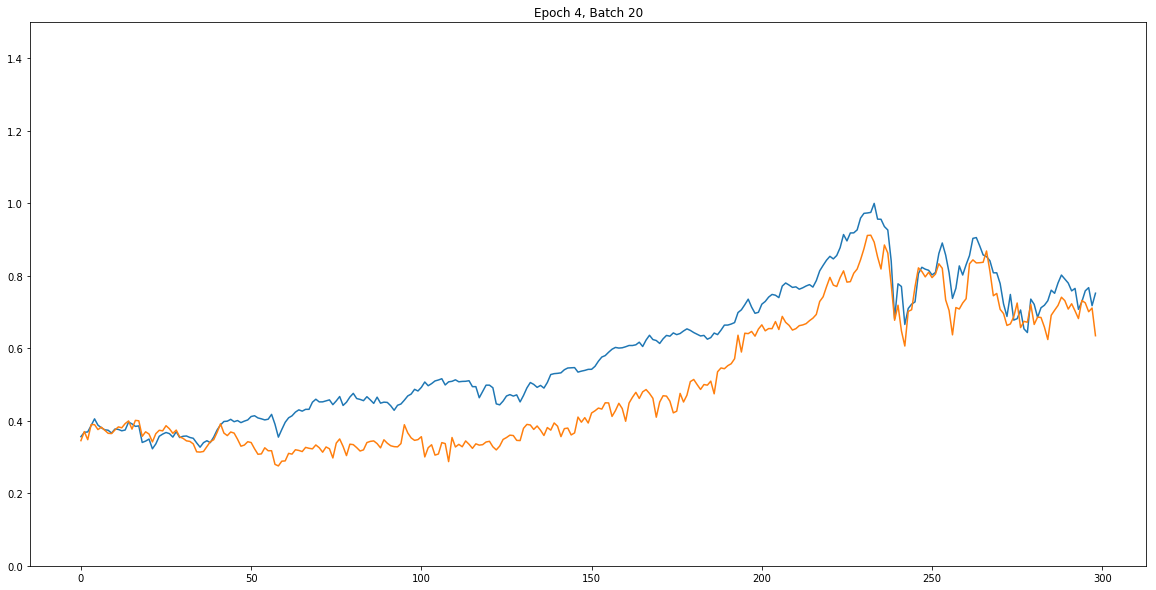

MSE Train:  0.000446049
MSE Test:  0.00932646


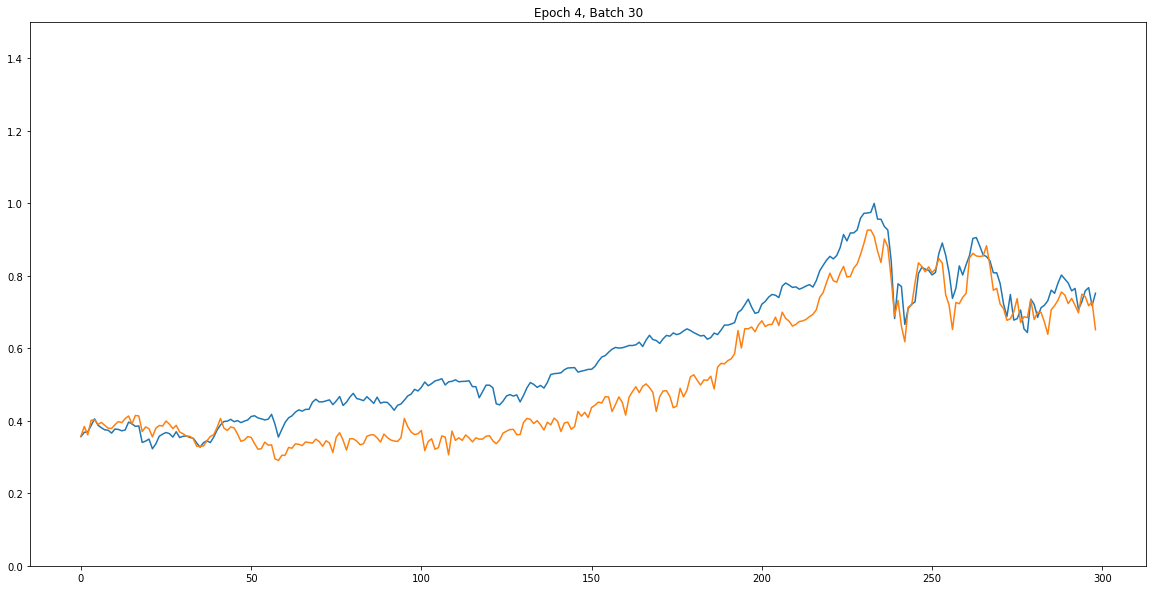

MSE Train:  0.000444235
MSE Test:  0.00914929


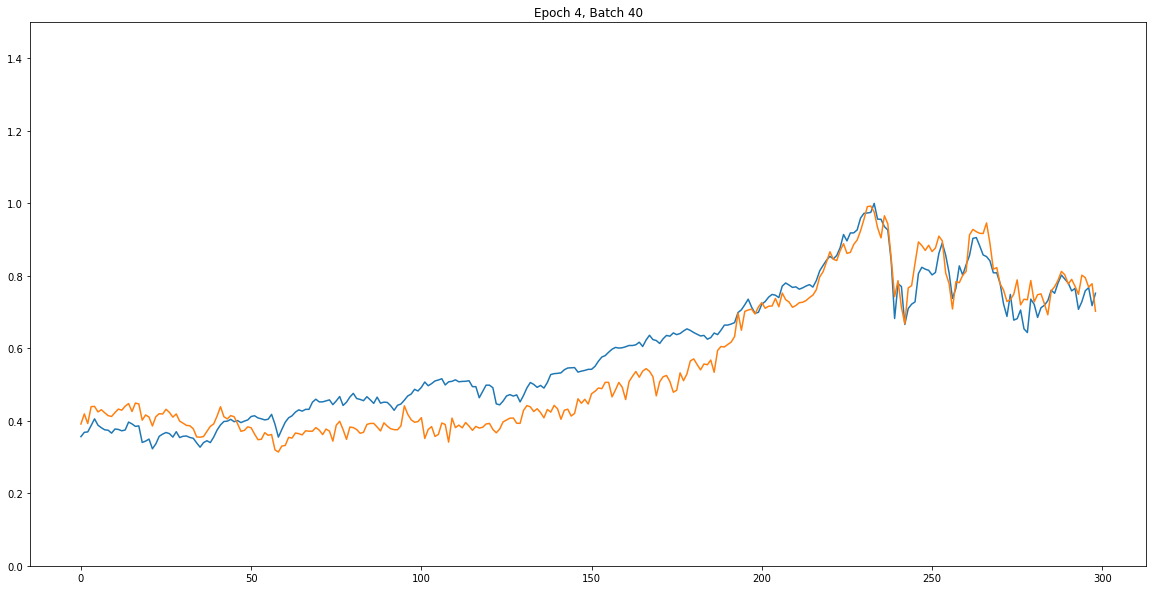

MSE Train:  0.000456059
MSE Test:  0.00914939


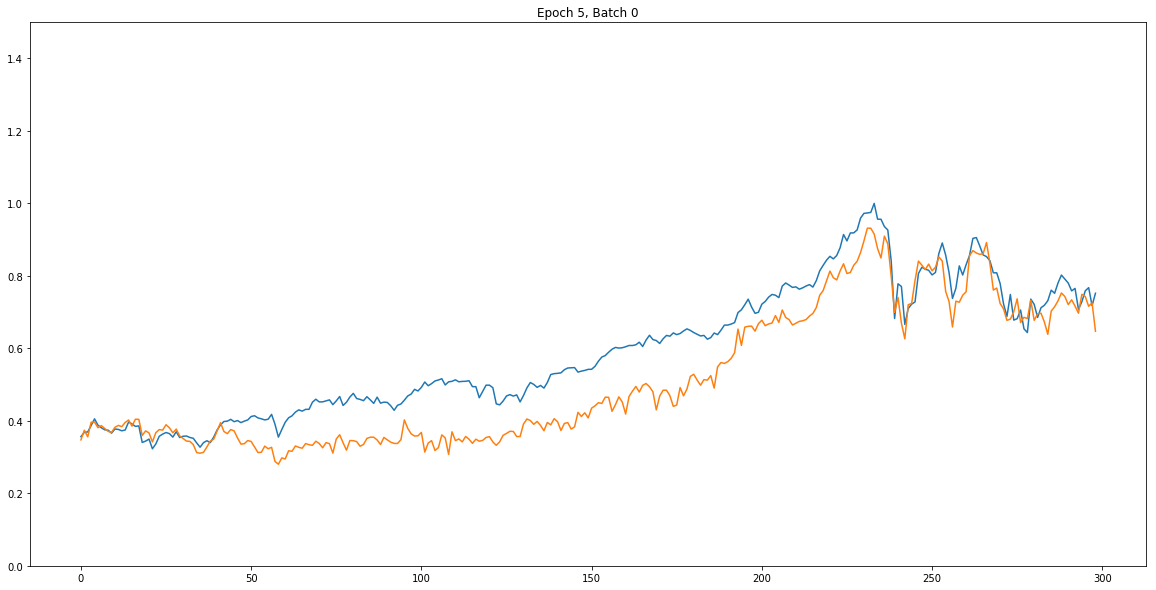

MSE Train:  0.000466066
MSE Test:  0.00903308


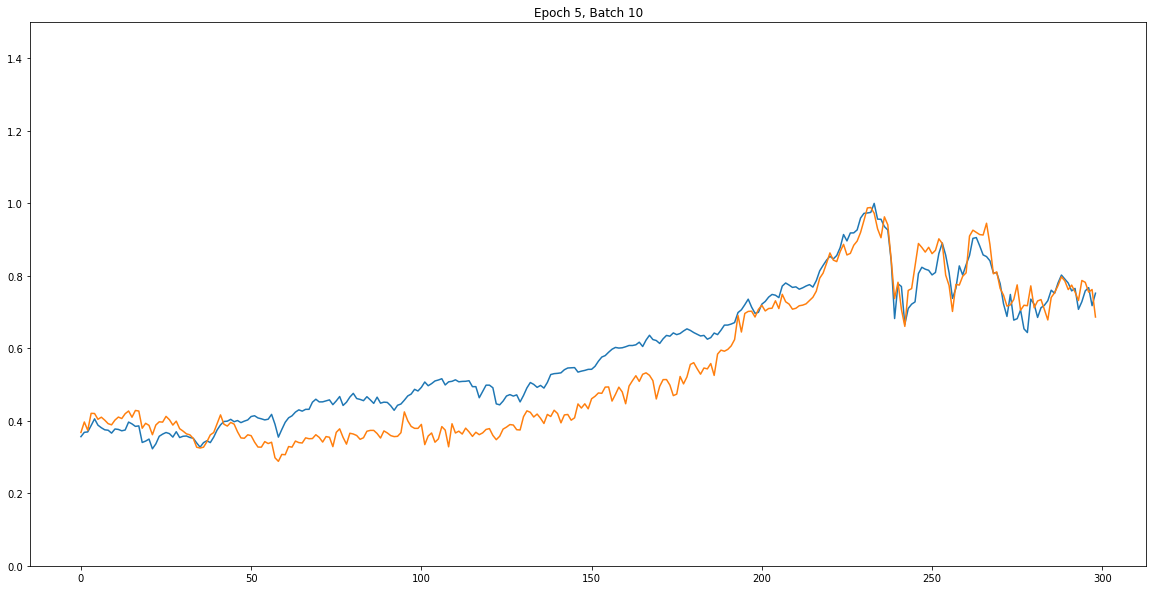

MSE Train:  0.000455124
MSE Test:  0.00898476


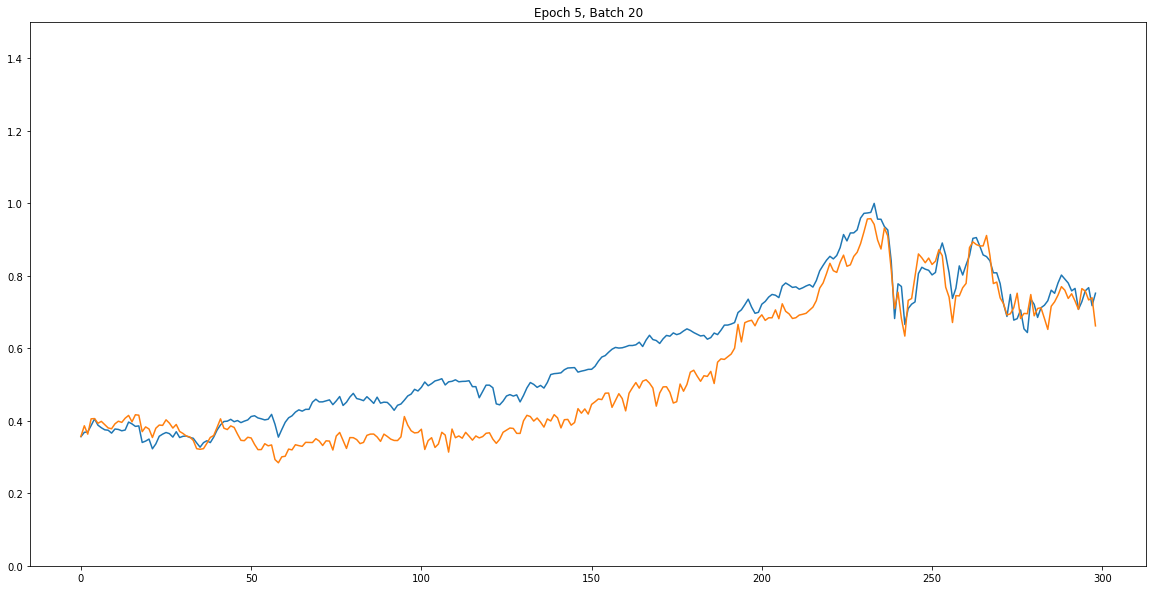

MSE Train:  0.000451149
MSE Test:  0.008953


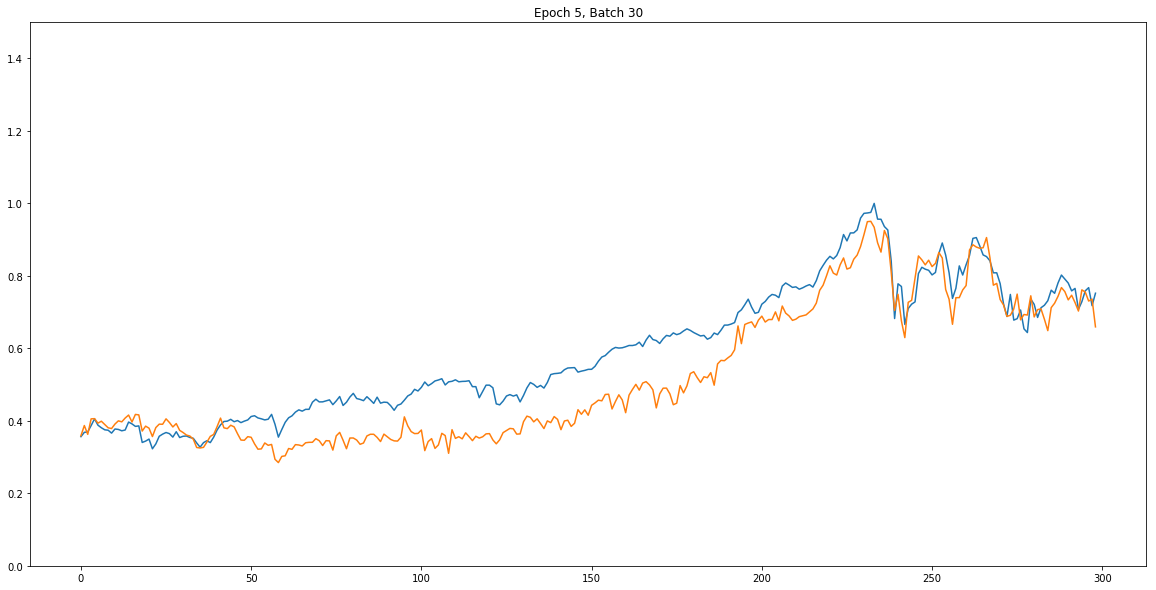

MSE Train:  0.000444855
MSE Test:  0.00894451


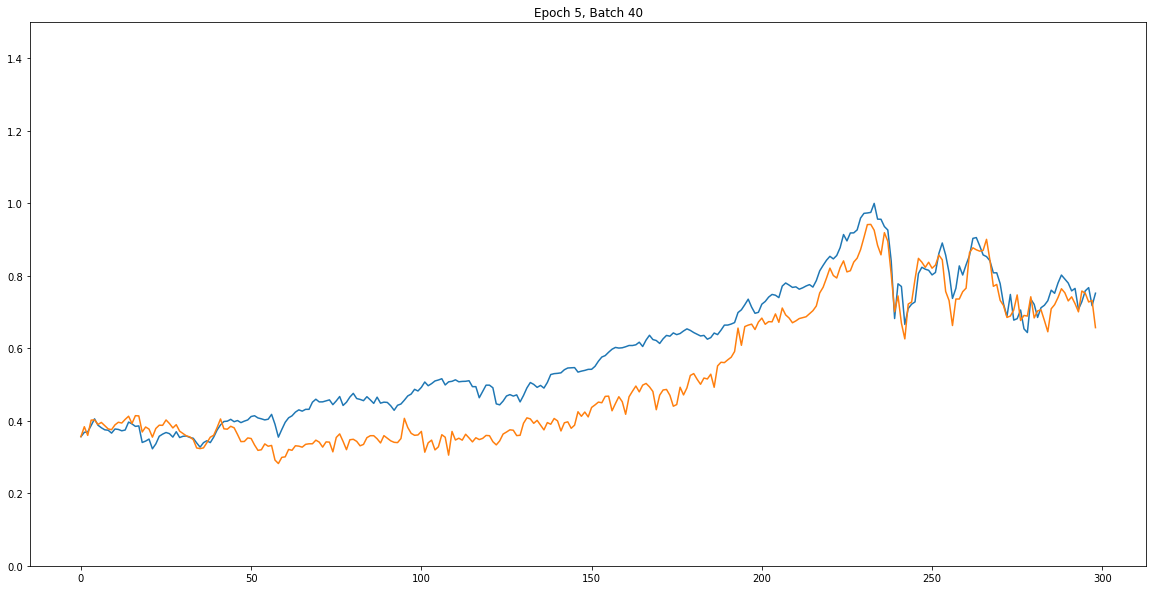

MSE Train:  0.000435643
MSE Test:  0.00890359


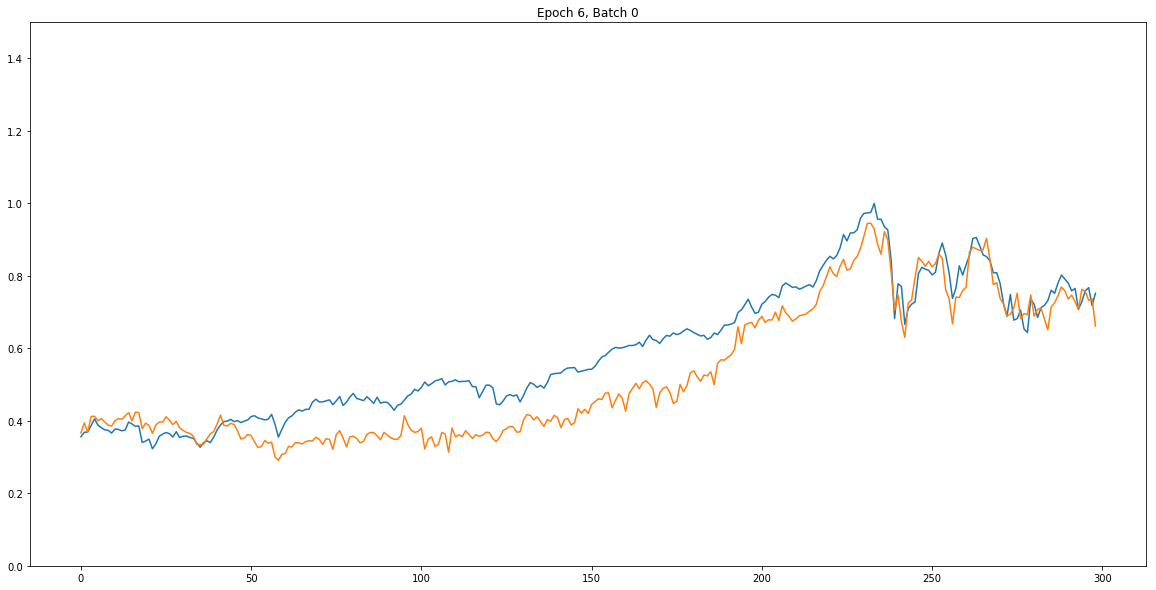

MSE Train:  0.000426763
MSE Test:  0.00884661


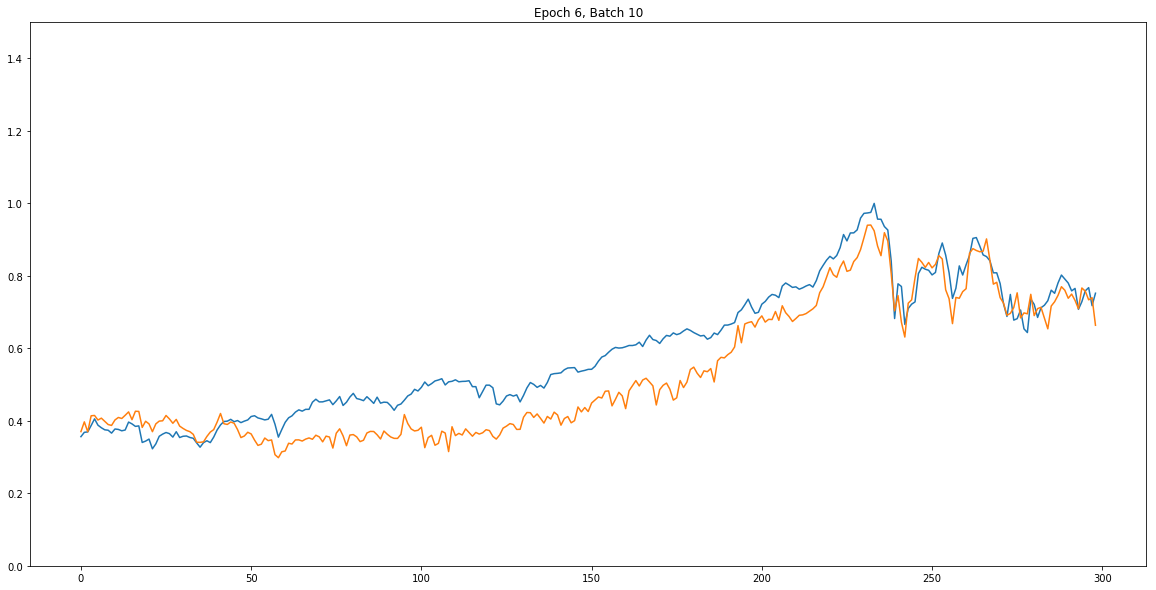

MSE Train:  0.000419503
MSE Test:  0.00895024


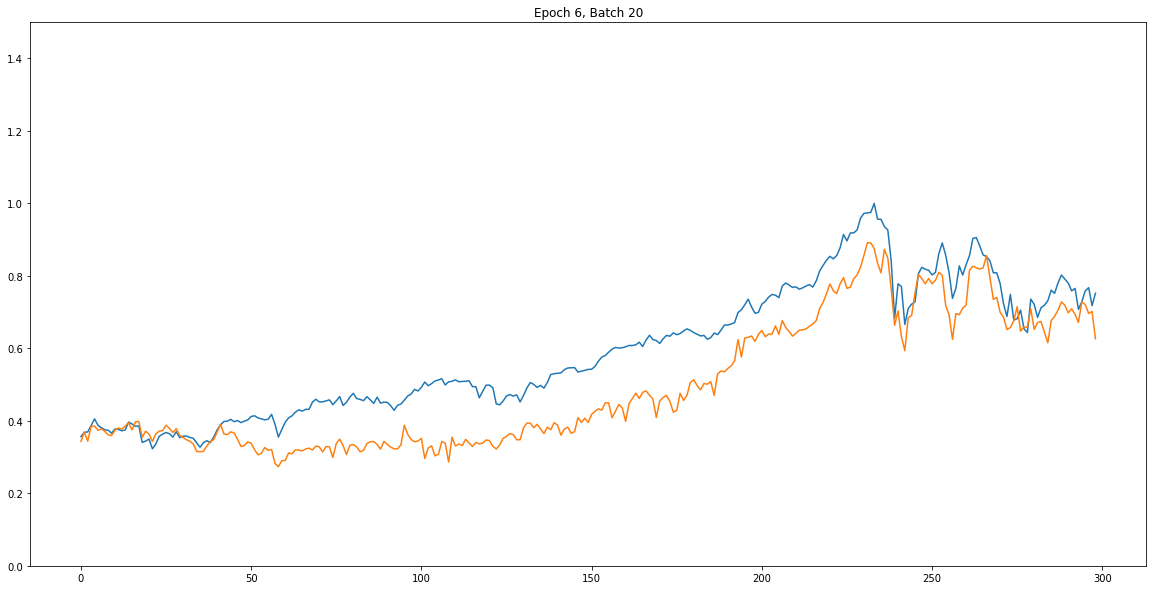

MSE Train:  0.000411534
MSE Test:  0.00905403


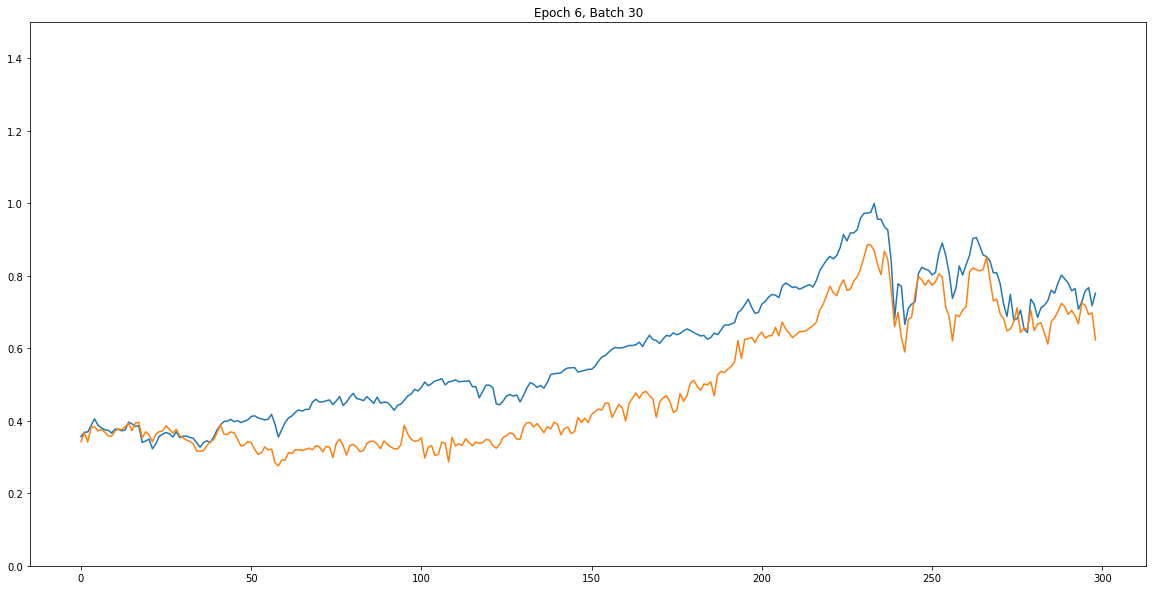

MSE Train:  0.000405564
MSE Test:  0.00905076


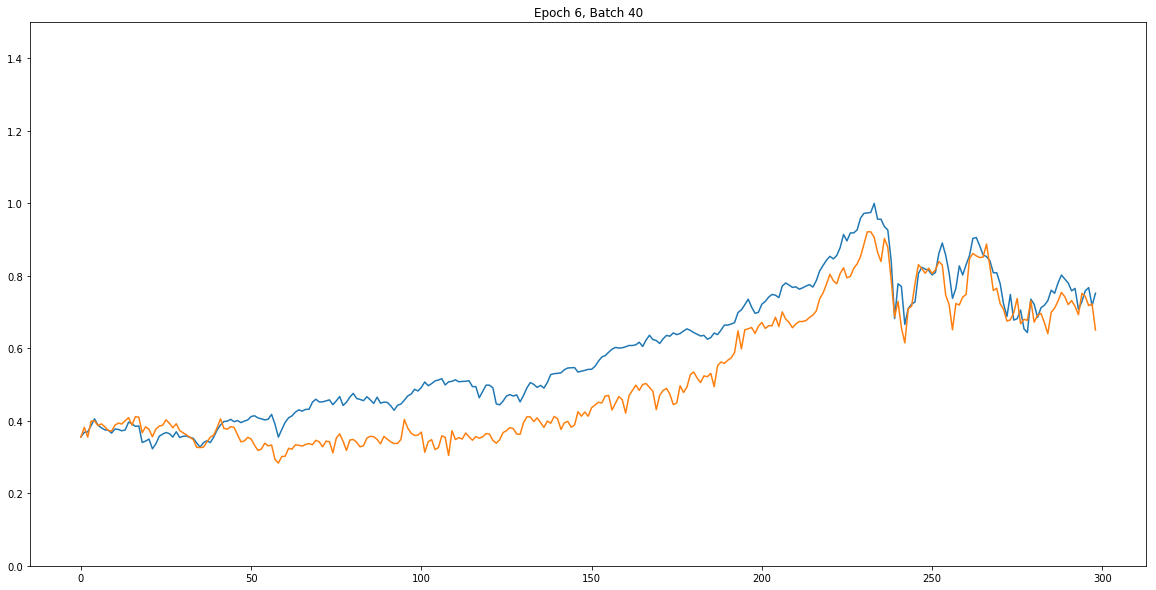

MSE Train:  0.000397909
MSE Test:  0.00902377


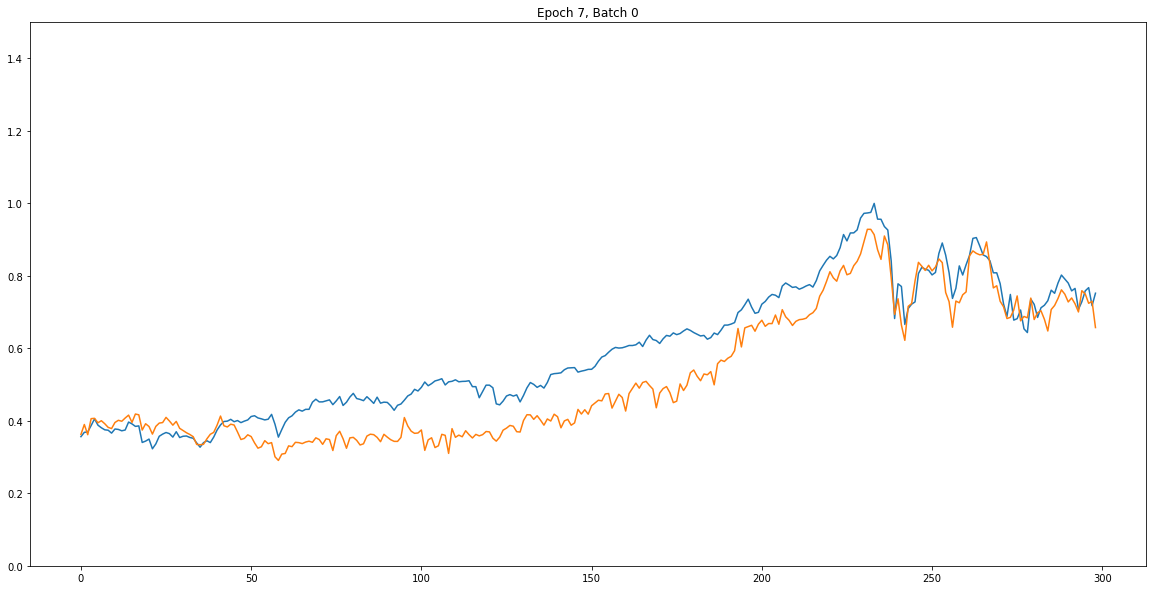

MSE Train:  0.000395679
MSE Test:  0.00907967


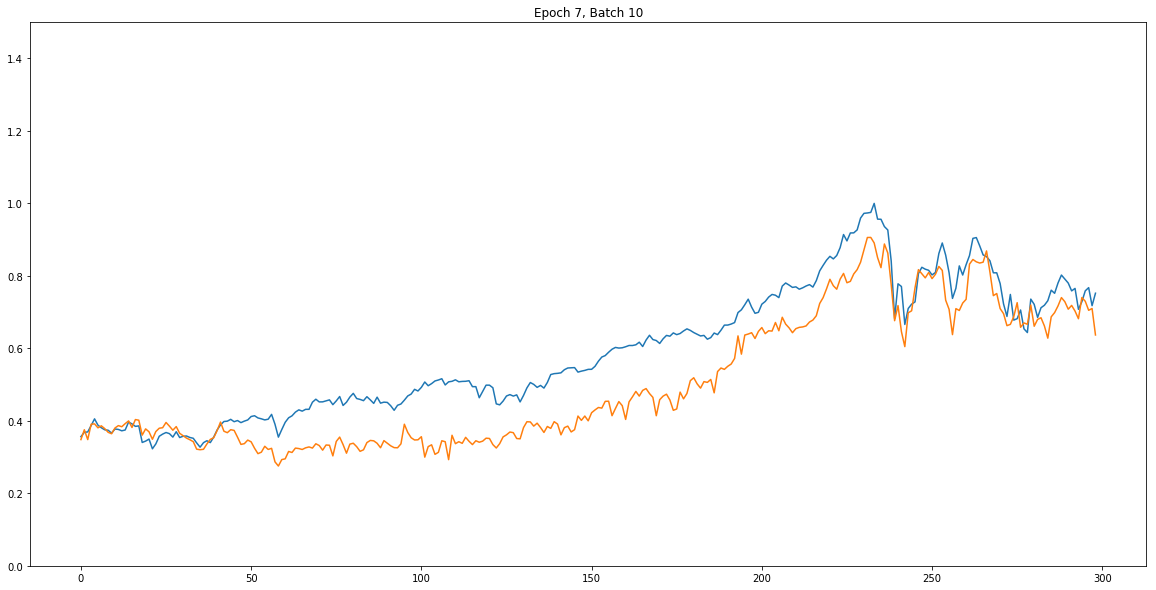

MSE Train:  0.000388372
MSE Test:  0.00912412


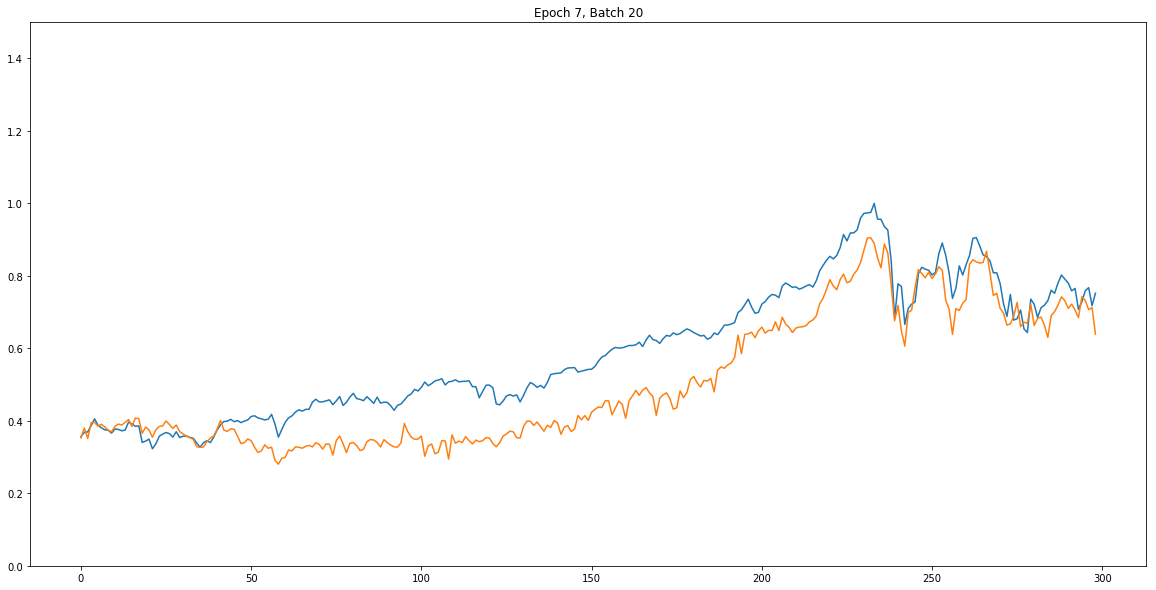

MSE Train:  0.000381733
MSE Test:  0.00927862


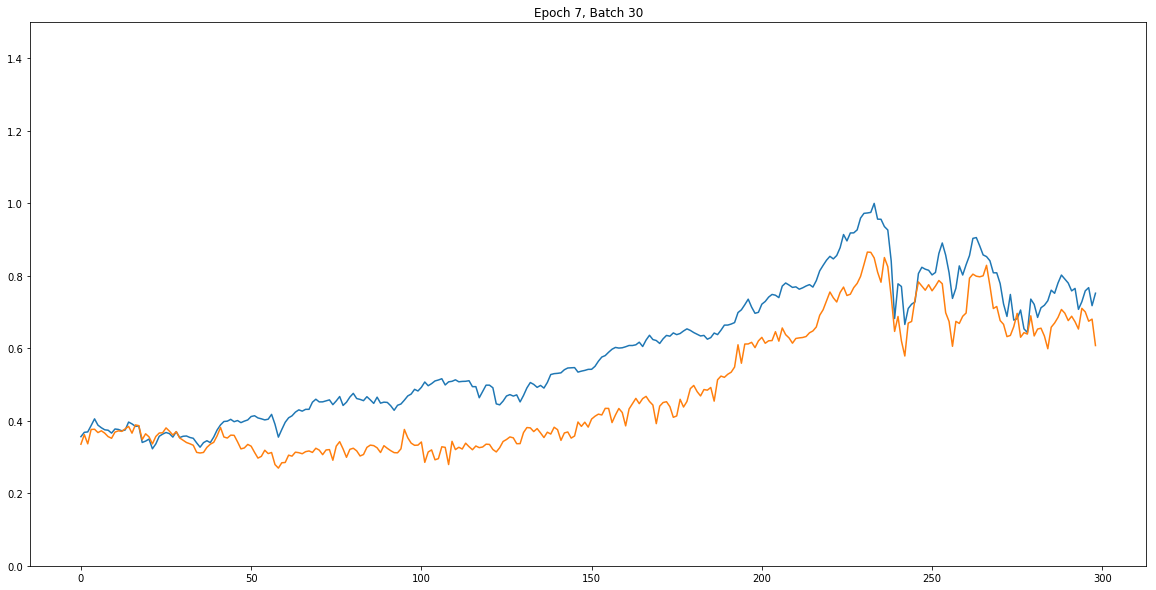

MSE Train:  0.000375289
MSE Test:  0.00927046


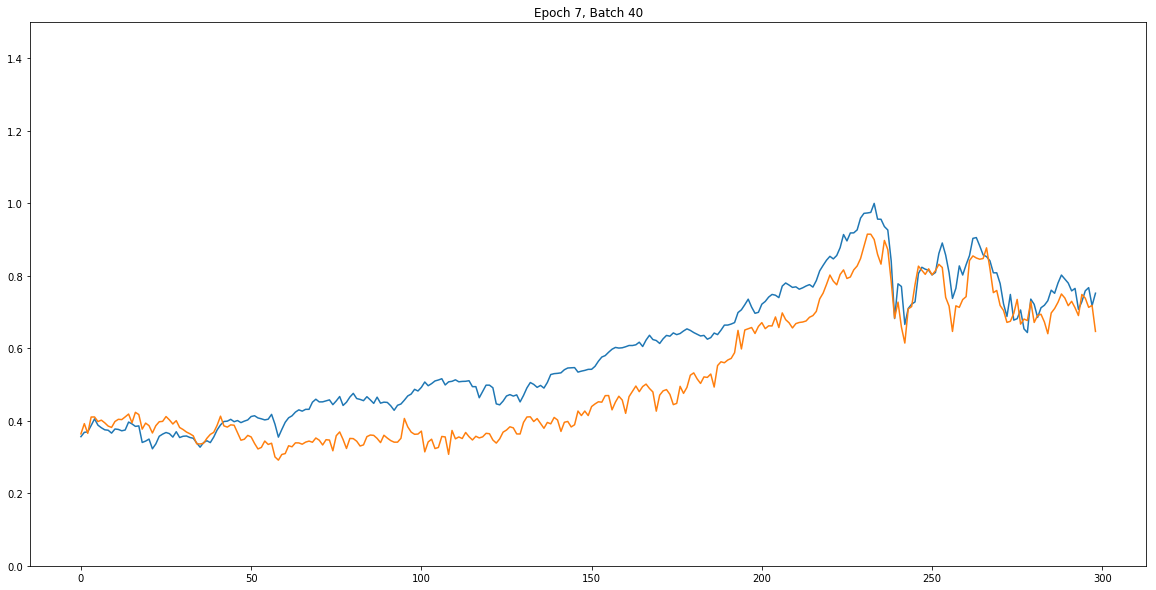

MSE Train:  0.000371815
MSE Test:  0.00924398


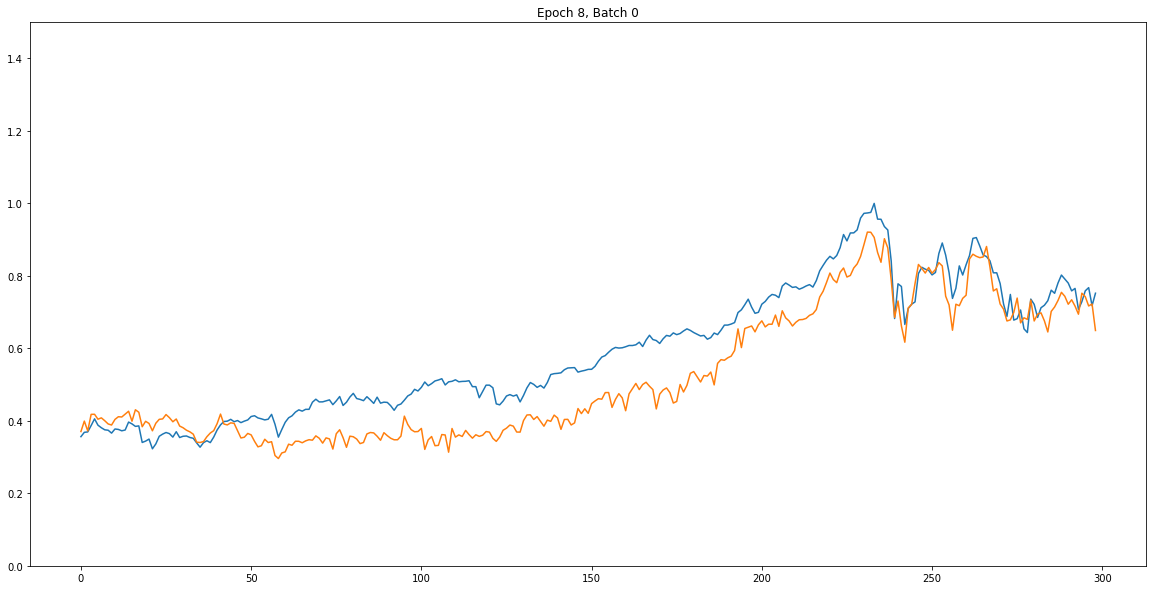

MSE Train:  0.000366883
MSE Test:  0.00934054


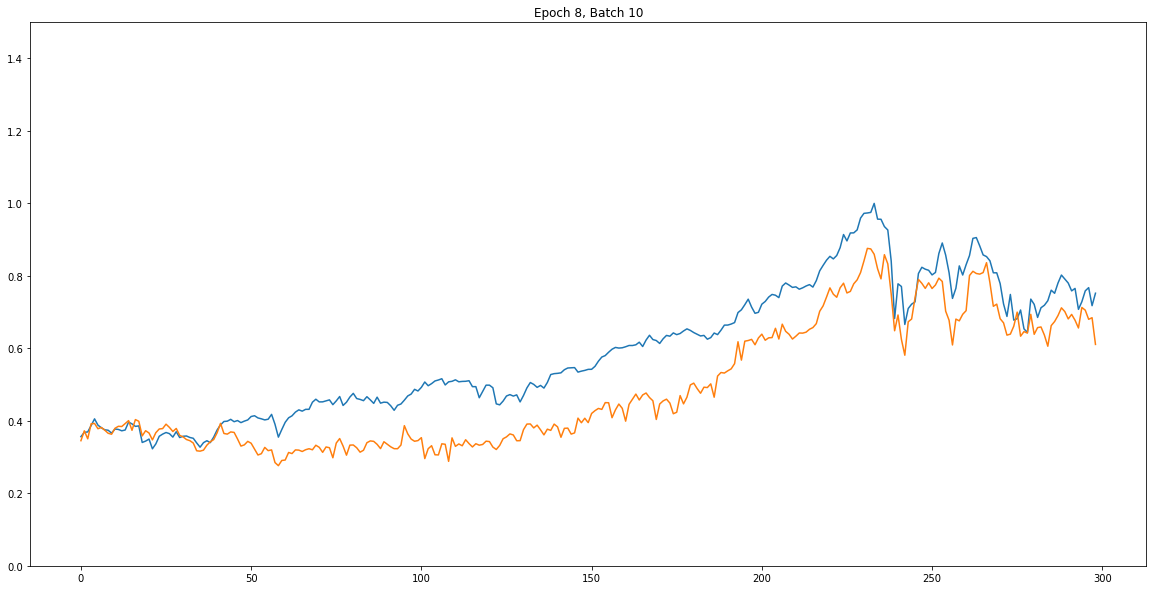

MSE Train:  0.000361202
MSE Test:  0.00937785


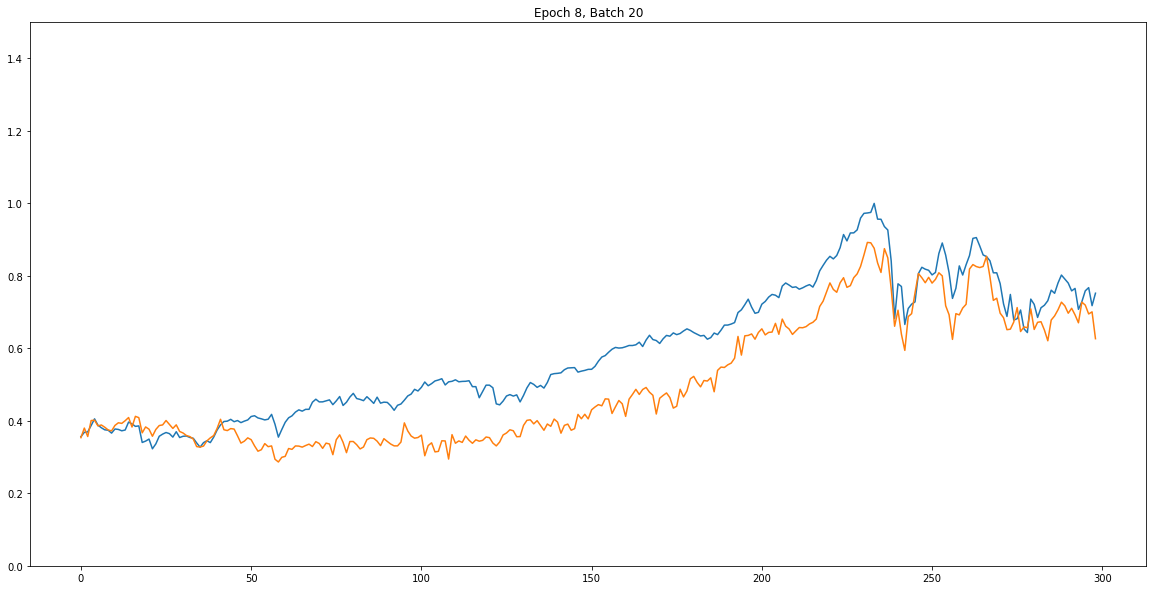

MSE Train:  0.000356841
MSE Test:  0.00937845


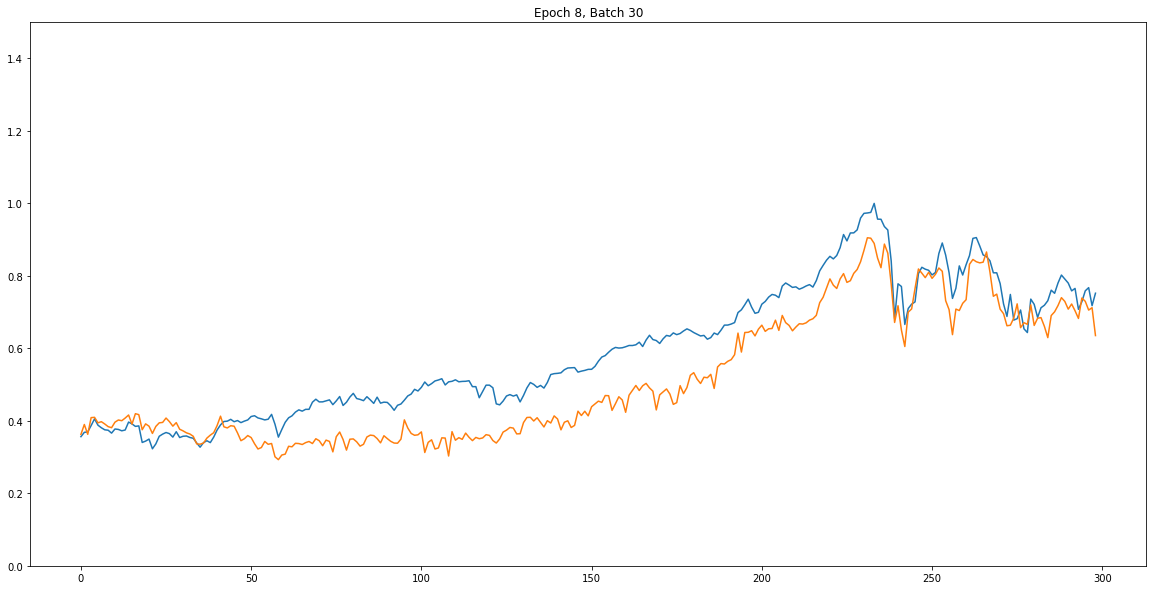

MSE Train:  0.000352214
MSE Test:  0.00935967


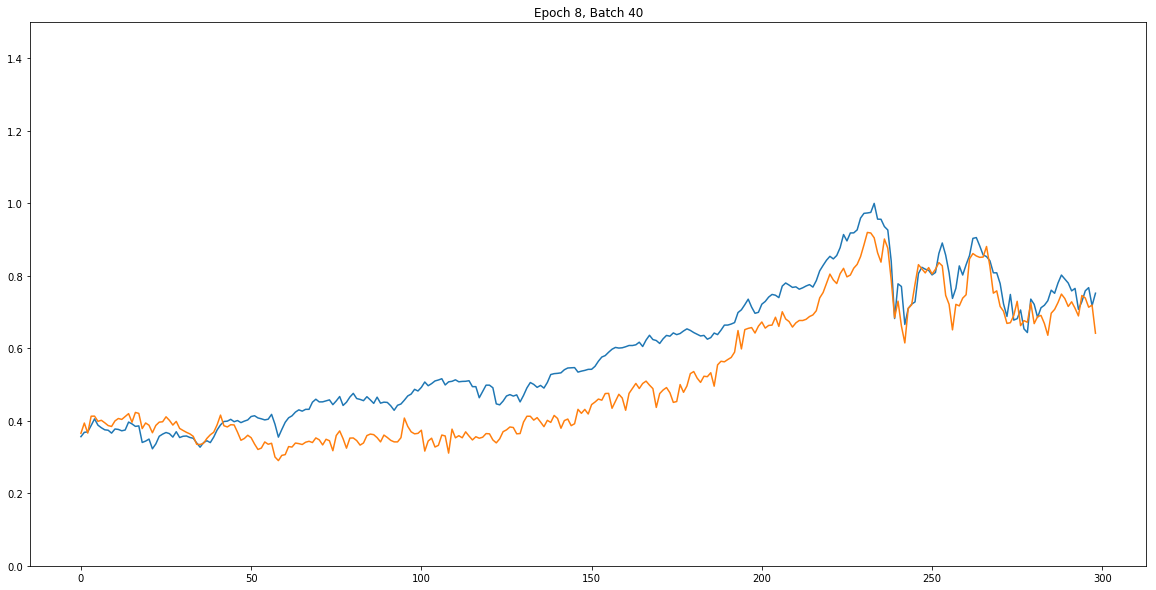

MSE Train:  0.000347549
MSE Test:  0.00934626


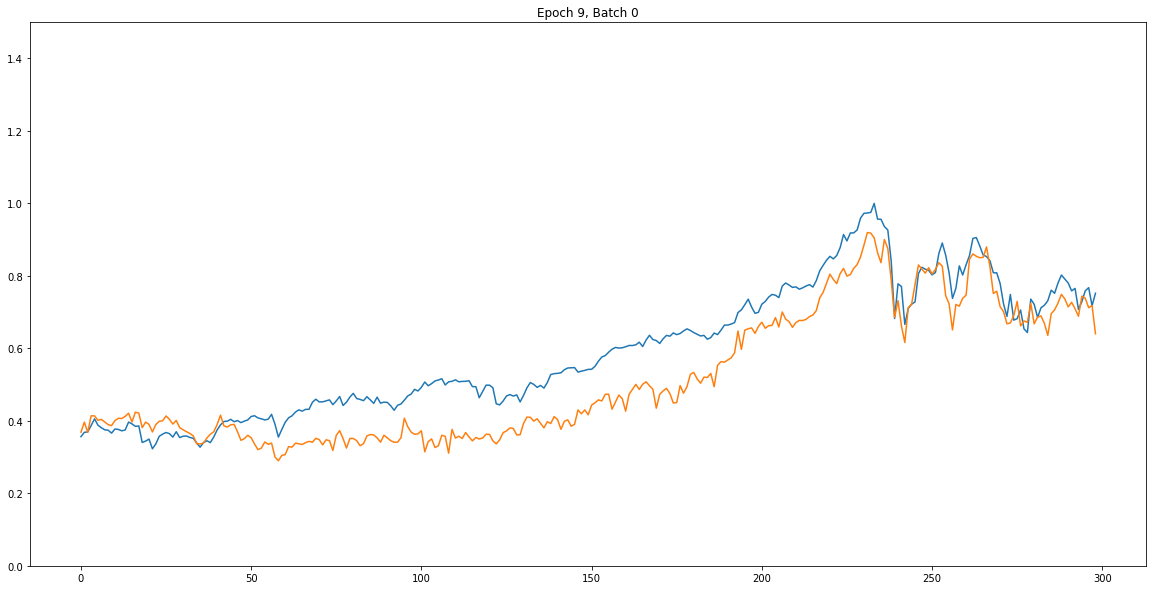

MSE Train:  0.000342439
MSE Test:  0.00936421


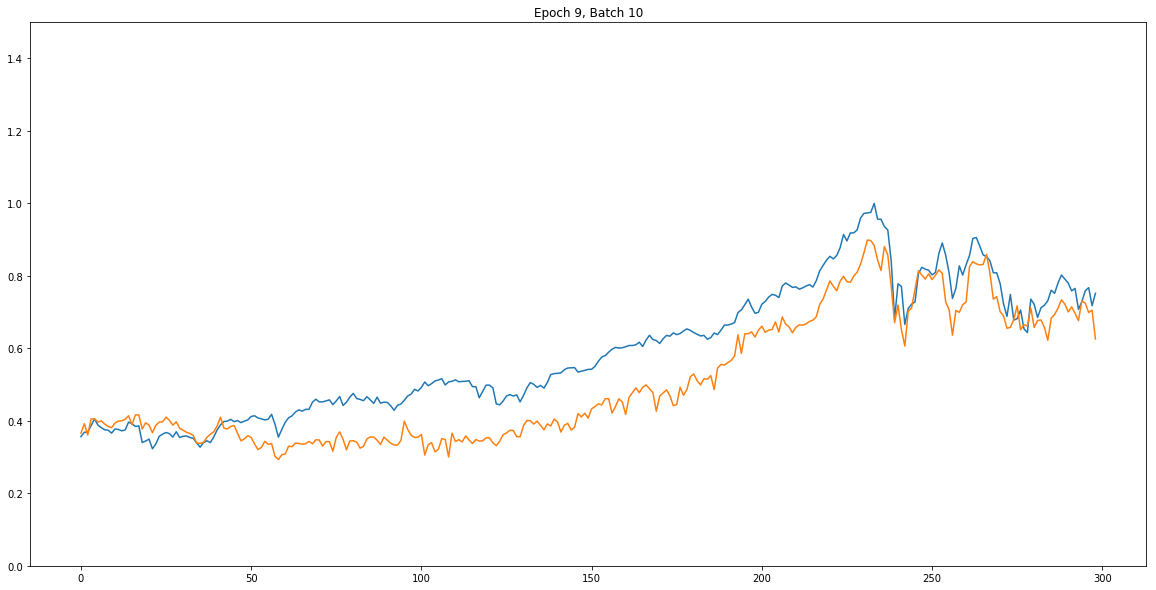

MSE Train:  0.000337602
MSE Test:  0.00937729


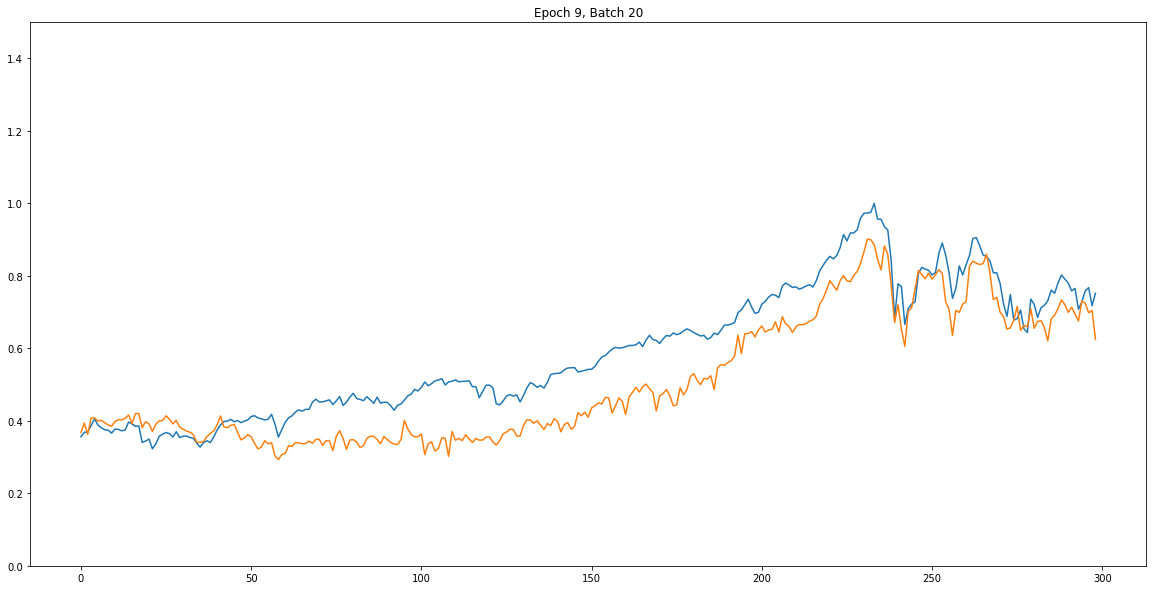

MSE Train:  0.000333101
MSE Test:  0.00939626


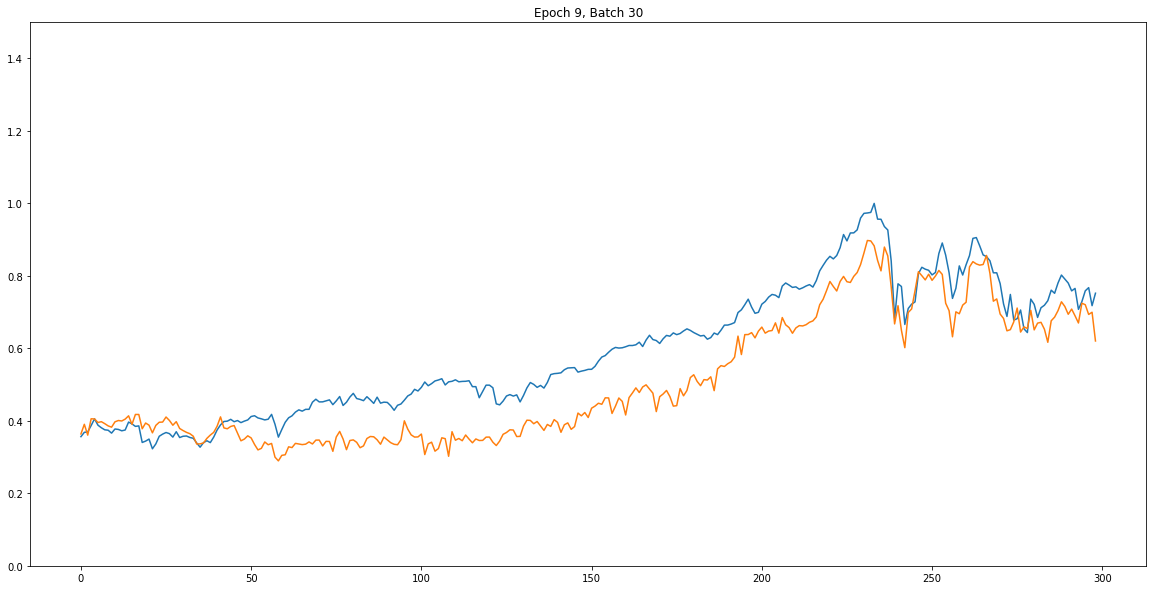

MSE Train:  0.000328802
MSE Test:  0.00933496


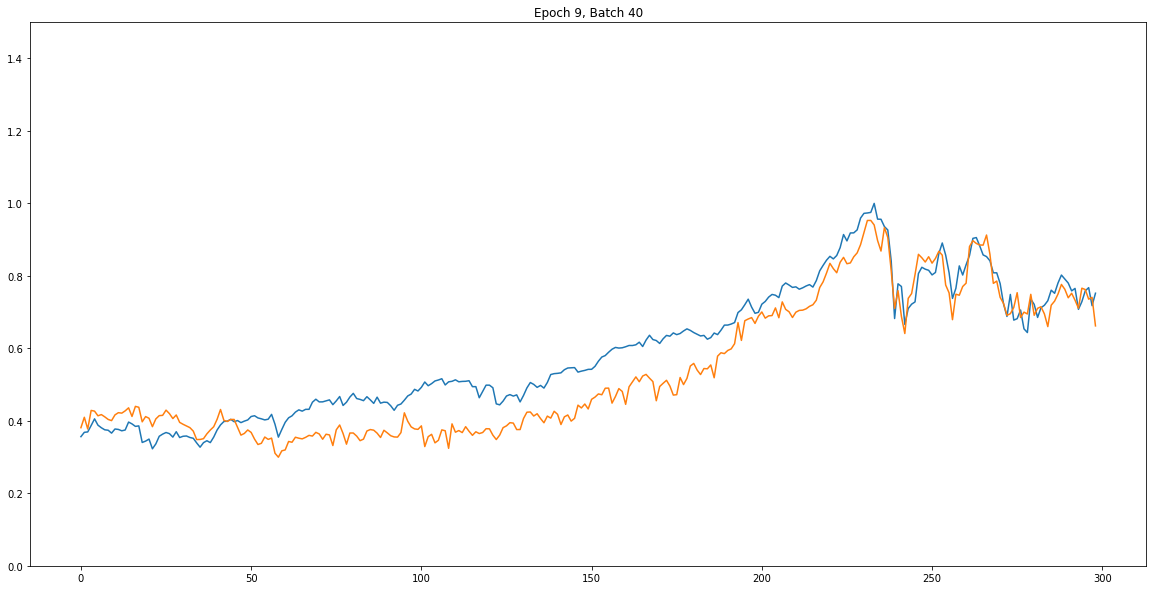

In [32]:
# Fit neural net and use minibatch training
# We will work with 10 epochs and a batch size of 25 for each epoch
batch_size = 25
mse_train = []
mse_test = []

epochs = 10
for e in range(epochs):
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        net.run(opt, feed_dict={placeholder_x: batch_x, placeholder_y: batch_y})
        if np.mod(i, 10) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={placeholder_x: X_train, placeholder_y: y_train}))
            mse_test.append(net.run(mse, feed_dict={placeholder_x: X_test, placeholder_y: y_test}))
            print('MSE Train: ', np.average(mse_train))
            print('MSE Test: ', np.average(mse_test))
            fig = plt.figure(figsize=(20,10))
            ax1 = fig.add_subplot(111)
            pred = net.run(out, feed_dict={placeholder_x: X_test})
            line1, = ax1.plot(y_test)
            line2, = ax1.plot(pred[0])
            line2.set_ydata(pred[0])
            plt.ylim(0,1.5)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            plt.savefig('Epoch ' + str(e) + ', Batch ' + str(i)+'.png')
            plt.pause(0.01)

## Video of neural network model fitting 

In [38]:
video = io.open('converge4.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

### Conclusion
Based on neural network, we can predict the stock prices developing the 2 layer dense neural network. Dense network uncovers hidden interaction between the data.

### Further Enhancements
- Data can be further consolidated using the data of commodities like Gold, crude oil, other countries stock prices
- Historical data can be made robust by adding more granularity to the data by adding minute level data